# **Análise de série temporal do consumo de energia elétrica jan/1985 a jan/2018**


# **Parte 1: ANÁLISE DESCRITIVA DA SÉRIE TEMPORAL**

In [2]:
#importar pacotes e personalizar configurações de gráficos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()

%matplotlib inline

In [3]:
#url do conjunto de dados
dataset_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"
#criar um dataframe para o arquivo csv
df = pd.read_csv(dataset_path)
#visualizar o conjunto de dados
df
#df.head() #visualizar as primeiras colunas do banco de dados

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [4]:
#Converter a coluna DATE (tempo) para datetime e associar ao index do dateframe

df.DATE = pd.to_datetime(df.DATE, format="%m-%d-%Y")
df.set_index('DATE', inplace=True)
df.head(13)



,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


### **a) Classificação: a série temporal em estudo é discreta, pois as observações foram coletadas diariamente, ou seja, em intervalos específicos de tempo.**

### **b) Estatística descritiva da séries de consumo de energia elétrica**

In [ ]:
# Estatísticas descritivas
estatisticas = df.Value.describe()
print(estatisticas)

count    397.000000
mean      88.847218
std       15.387834
min       55.315100
25%       77.105200
50%       89.779500
75%      100.524400
max      129.404800
Name: Value, dtype: float64


### **Boxplot emparelhado do consumo de energia por mês**

In [ ]:
# Extraindo o mês e o dia da semana a partir do índice datetime
df['Mês'] = df.index.month_name().str.slice(stop=3)  # Abreviação do nome do mês
df['Dia_da_Semana'] = df.index.day_name()  # Nome completo do dia da semana

print(df.head())

              Value  Mês Dia_da_Semana
DATE                                  
1985-01-01  72.5052  Jan       Tuesday
1985-02-01  70.6720  Feb        Friday
1985-03-01  62.4502  Mar        Friday
1985-04-01  57.4714  Apr        Monday
1985-05-01  55.3151  May     Wednesday


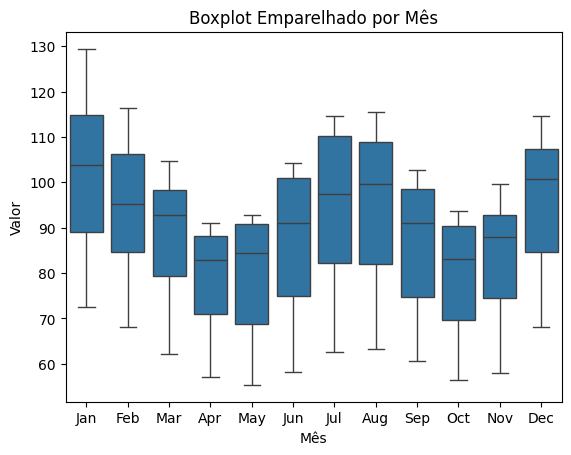

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#create seaborn boxplots by group
sns.boxplot(x='Mês', y='Value', data=df)
plt.title('Boxplot Emparelhado por Mês')
plt.suptitle('')  # Remove o título padrão "Boxplot grouped by Mês"
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.show()

###**c) Gráfico da série temporal no domínio da frequência**

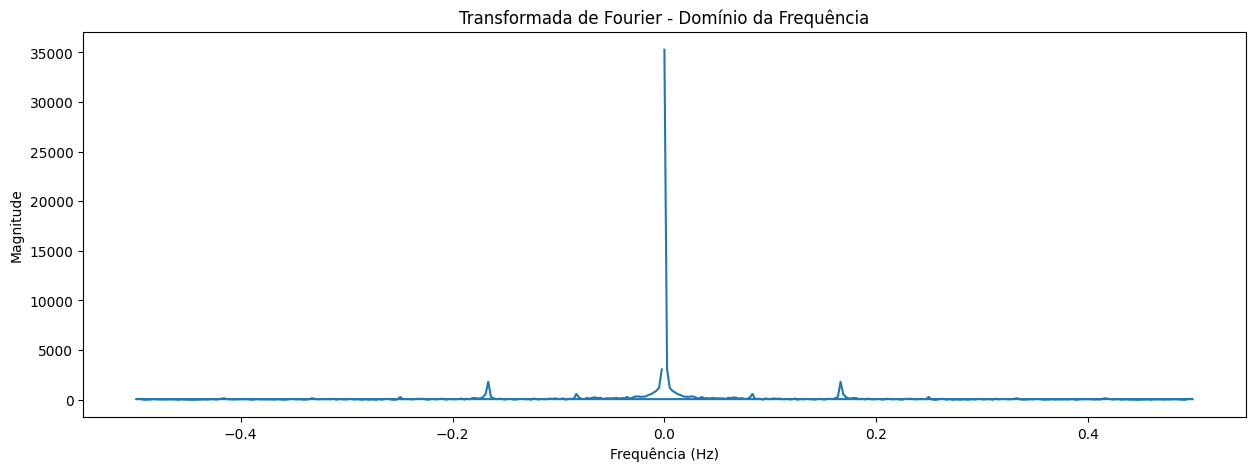

In [ ]:
#Gráfico no domínio da frequência
import numpy as np
import matplotlib.pyplot as plt

# Aplicar a Transformada Rápida de Fourier (FFT)
serie_frequencia = np.fft.fft(df.Value)

# Frequências correspondentes
frequencias = np.fft.fftfreq(len(df.Value))

# Plotar a série no domínio da frequência
plt.figure(figsize=(15, 5))
plt.plot(frequencias, np.abs(serie_frequencia))
plt.title('Transformada de Fourier - Domínio da Frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.show()


Período = 1/frequencia ----- Período =1/0,15=6 períodos

Significa que a série tem uma sazonalidade (ciclo) que se repete a cada 6 meses

### **d) Gráfico da série temporal no domínio do tempo**

In [ ]:
# Remover a coluna 'Mês' e 'Dia_da_Semana'  usando 'del'
del df['Mês']
del df['Dia_da_Semana']
print(df.head())


              Value
DATE               
1985-01-01  72.5052
1985-02-01  70.6720
1985-03-01  62.4502
1985-04-01  57.4714
1985-05-01  55.3151


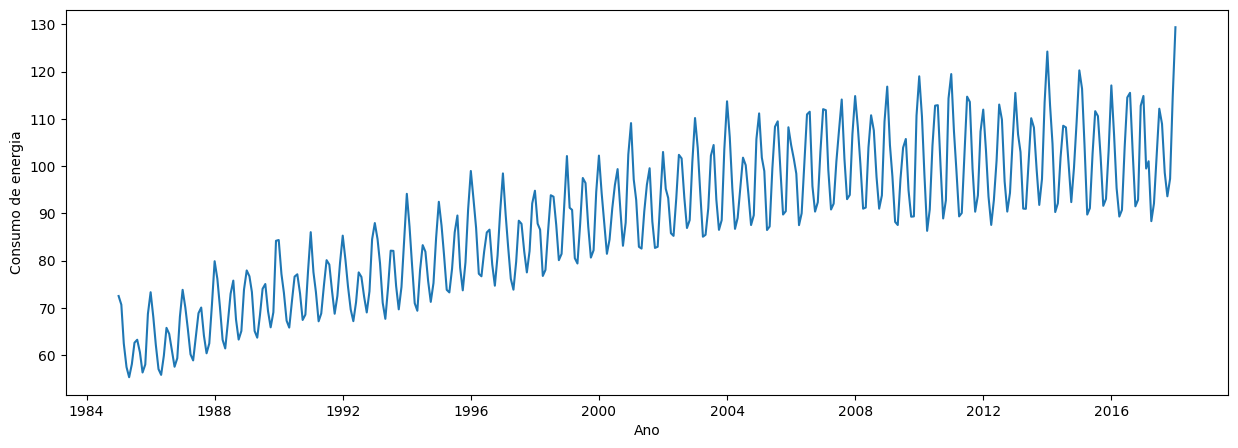

In [ ]:
#Gráfico no domínio do tempo
#Representação gráfica da séries temporal do consumo de energia elétrica
plt.figure(figsize=(15, 5))
plt.plot(df)
plt.title('')
plt.xlabel('Ano')
plt.ylabel('Consumo de energia')
plt.show()


Percebe-se um aumento da magnitude da série indicando uma heterogeneidade de variância. Observa-se uma tendência de crescimento na série ao longo dos anos e uma média não constante.

### **e) Média e variância dos dados**



### **f) Decomposição da Série temporal**

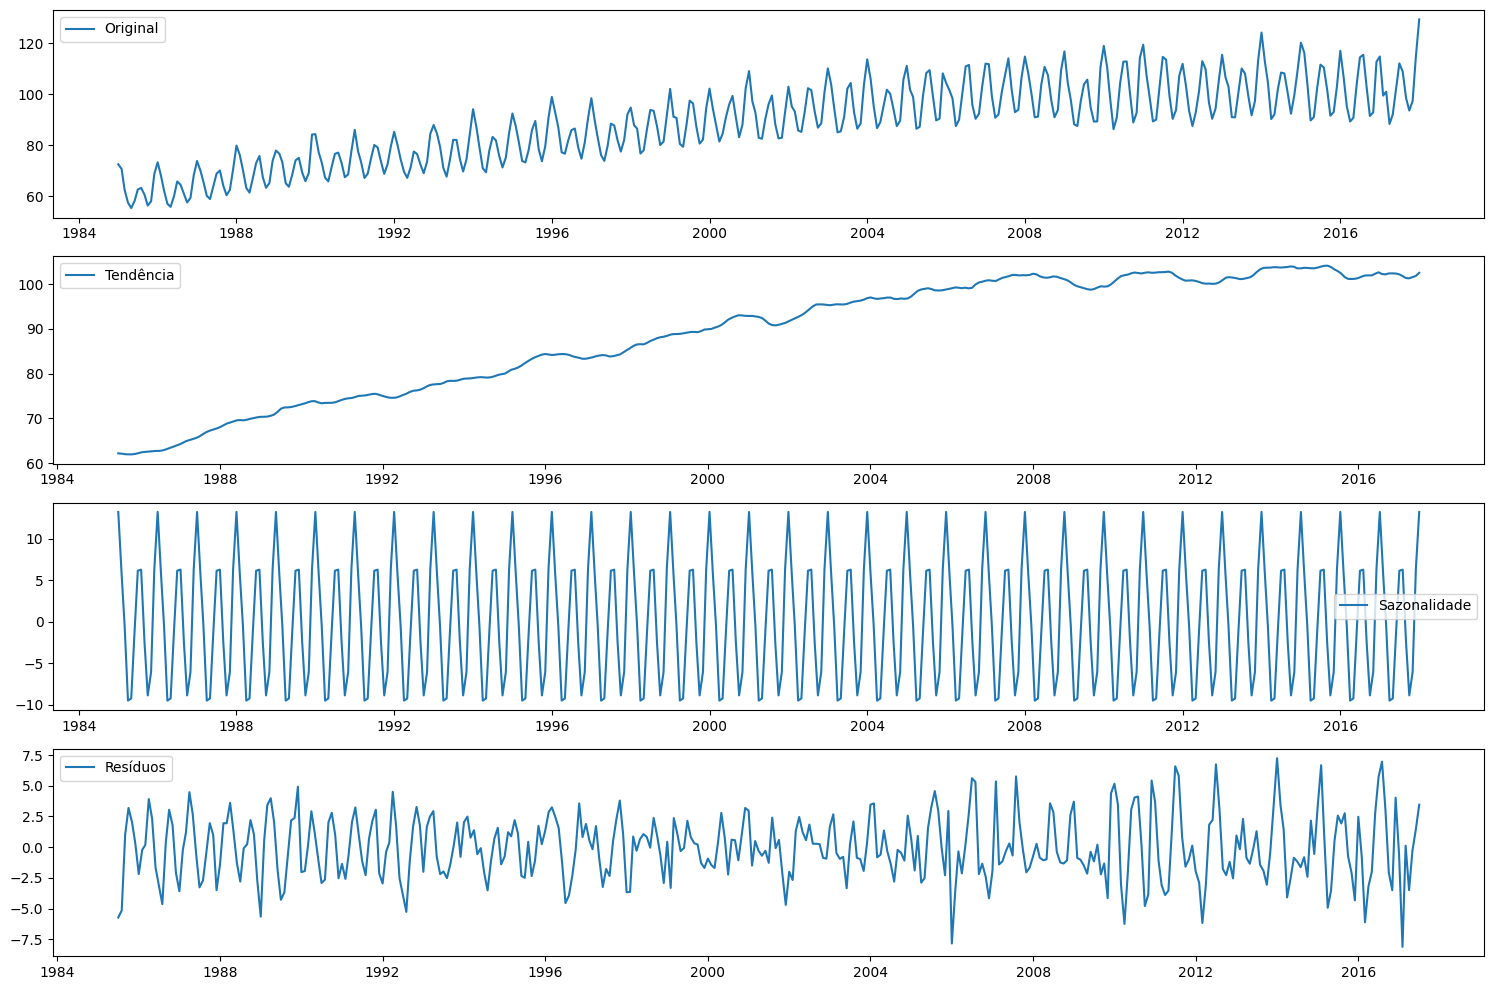

In [ ]:
# Decomposição aditiva
decomposition = seasonal_decompose(df, model='additive', period=12) #model= 'multiplicative' ou 'additive'

# Plotar os componentes
plt.figure(figsize=(15, 10))

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Tendência')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Sazonalidade')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Resíduos')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Plotar os componentes
#fig = decomposition.plot()
#plt.show()

### **Extração da componente sazonal para entender o período de maior demanda do consumo de energia elétrica**

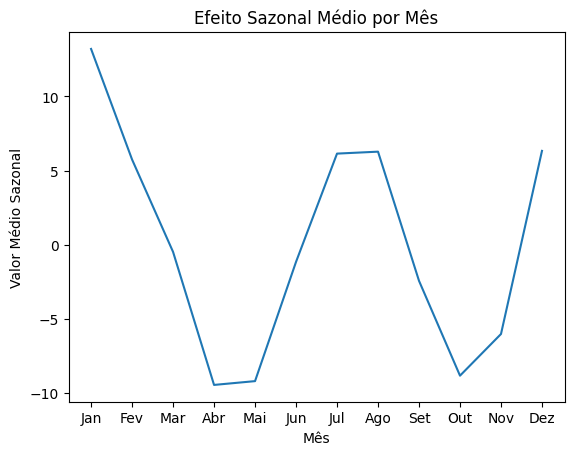

In [ ]:
# Extração da componente sazonal
seasonal = decomposition.seasonal

# Agrupando por mês para visualizar o efeito sazonal médio de cada mês
seasonal_monthly = seasonal.groupby(seasonal.index.month).mean()

# Plotando o efeito sazonal por mês
seasonal_monthly.plot(kind='line')
plt.title('Efeito Sazonal Médio por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Médio Sazonal')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=0)
plt.show()

### **g) Verificar estacionariedade (média e variância constante)**

### **1) Correlograma**

Pontos fora da faixa de confiança pode indicar autocorrelação temporal da série positiva, ou seja, uma tendência significativa

<Figure size 1500x500 with 0 Axes>

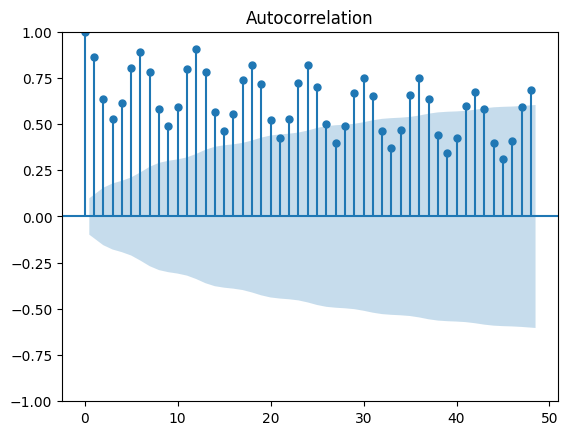

<Figure size 1500x500 with 0 Axes>

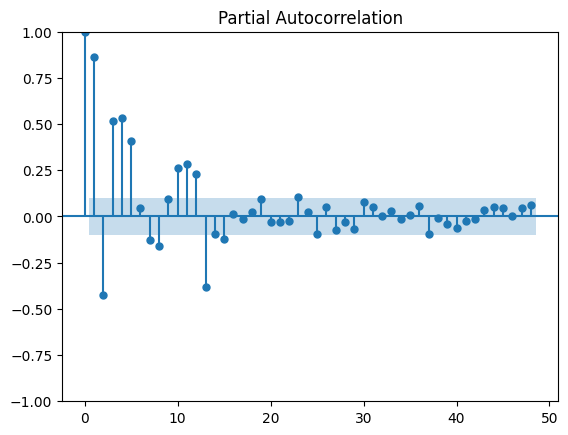

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plotando a função de autocorrelação
plt.figure(figsize=(15, 5))
plot_acf(df, lags=48)
plt.show()

# Plotando a função de autocorrelação parcial
plt.figure(figsize=(15, 5))
plot_pacf(df, lags=48)
plt.show()

### **2) Teste de Dickey-Fuller Aumentado para verificar estacionariedade**

H0: a series não é estacionária

H1: a series é estacionária.

pvalor< alpha (nível de significância geralmente 5%) = rejeita-se H0

In [ ]:
# aplicar ADF e imprimir o resultado
from statsmodels.tsa.stattools import adfuller # importar o teste ADF
result = adfuller(df)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores Críticos:')
for key, value in result[4].items():
     print('\t{}: {:.4f}'.format(key, value))

# Interpretação do resultado
if result[1] < 0.05:
    print("A série é estacionária (Rejeita H0).")
else:
   print("A série não é estacionária (Não rejeita H0).")

Dickey-Fuller Aumentado
Teste Estatístico: -2.2570
Valor-p: 0.1862
Valores Críticos:
	1%: -3.4476
	5%: -2.8692
	10%: -2.5708
A série não é estacionária (Não rejeita H0).


### **3) Teste de Mann Kendall para verificar Tendência**

H0: Nao existe tendência significativa

H1: Existe tendência significativa

pvalor < nível de significância de 5% rejeita H0

In [ ]:
pip install pymannkendall


In [ ]:
import pymannkendall as mk

In [ ]:
result = mk.original_test(df['Value'])
print(result)
print('Teste de Mann_Kendall')
print('Teste Estatístico: {:.4f}'.format(result[3]))
print('Valor-p: {:.4f}'.format(result[2]))
print('Tipo de Tendência: {:s}'.format(result[0]))

# Interpretação do resultado
if result[2] < 0.05:
    print("A série apresenta tendência significativa (Rejeita H0).")
else:
   print("A série não apresenta tendência significativa(Não rejeita H0).")


Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=19.125339232804578, Tau=0.6427499173091112, s=50524.0, var_s=6978466.0, slope=0.11486610139860137, intercept=67.03601192307693)
Teste de Mann_Kendall
Teste Estatístico: 19.1253
Valor-p: 0.0000
Tipo de Tendência: increasing
A série apresenta tendência significativa (Rejeita H0).


### **4) Teste de Ljungbox para verificar autocorrelação sazonal**

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Decomposição STL
stl = sm.tsa.seasonal_decompose(df['Value'], period=12)  # periodo depende da sua série

# Teste de Ljung-Box nos resíduos
residuals = stl.resid.dropna()
ljung_box_test = acorr_ljungbox(residuals, lags=[12], return_df=True)
print(ljung_box_test)

print('Teste de Ljung-Box')
print('Teste Estatístico: {:.4f}'.format(ljung_box_test['lb_stat'].values[0]))
print('Valor-p: {:.4f}'.format(ljung_box_test['lb_pvalue'].values[0]))

# Interpretação do resultado
if ljung_box_test['lb_pvalue'].values[0] < 0.05:
    print("A série apresenta autocorrelação sazonal significativa (Rejeita H0).")
else:
    print("A série não apresenta autocorrelação sazonal significativa (Não rejeita H0).")


       lb_stat     lb_pvalue
12  342.060641  6.629303e-66
Teste de Ljung-Box
Teste Estatístico: 342.0606
Valor-p: 0.0000
A série apresenta autocorrelação sazonal significativa (Rejeita H0).


### **4) Teste para avaliar homogeneidade de Variância**

In [ ]:
from scipy.stats import bartlett

# Exemplo de dados: três grupos diferentes
serie1 = df.Value[:198]
serie2 = df.Value[199:]


# Realizando o teste de Bartlett
estatistica, p_valor = bartlett(serie1,serie2)

# Exibindo os resultados
print(f'Estatística de Bartlett: {estatistica}')
print(f'Valor-p: {p_valor}')

# Interpretação do resultado
if p_valor < 0.05:
    print("As variâncias são significativamente diferentes (Rejeita H0).")
else:
    print("Não há evidências suficientes para afirmar que as variâncias são diferentes (Não rejeita H0).")


Estatística de Bartlett: 4.161042731121508
Valor-p: 0.041363932023817704
As variâncias são significativamente diferentes (Rejeita H0).


## **Resultado: Como a série não é estacionária será utilizado o método de diferenciação para transformar a série em estacionária**

### **h) Método da diferenciação para transformar a série em estacionária**

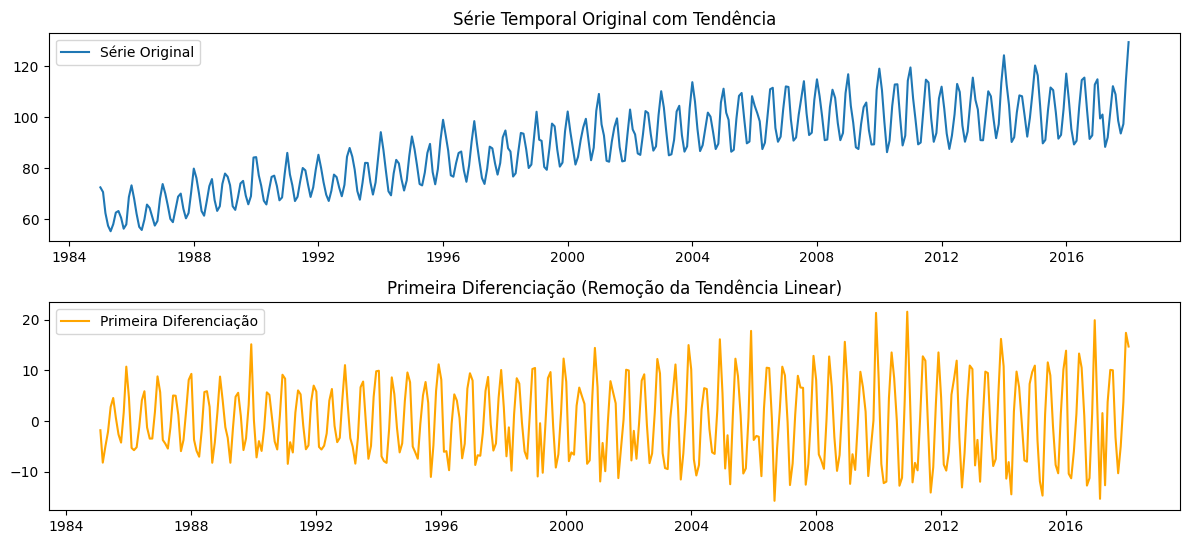

In [ ]:
# Aplicar a primeira diferenciação
diff_df = df['Value'].diff().dropna()#Aplica a diferenciação à série e remove o primeiro valor NaN

#Aplicar a segunda diferenciação
#df['Segunda_Diferenca'] = df['Primeira_Diferenca'].diff().dropna()

# Visualizar os resultados
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df['Value'], label='Série Original')
plt.title('Série Temporal Original com Tendência')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(diff_df, label='Primeira Diferenciação', color='orange')
plt.title('Primeira Diferenciação (Remoção da Tendência Linear)')
plt.legend()

#plt.subplot(3, 1, 3)
#plt.plot(df['Segunda_Diferenca'], label='Segunda Diferenciação', color='green')
#plt.title('Segunda Diferenciação (Remoção da Tendência Residual)')
#plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(diff_df)

DATE
1985-02-01    -1.8332
1985-03-01    -8.2218
1985-04-01    -4.9788
1985-05-01    -2.1563
1985-06-01     2.7753
               ...   
2017-09-01   -10.3158
2017-10-01    -5.0017
2017-11-01     3.7222
2017-12-01    17.3853
2018-01-01    14.6836
Name: Value, Length: 396, dtype: float64


### **Teste de estacionariedade para a série diferenciada**

H0: a series não é estacionária

H1: a series é estacionária.

pvalor< alpha (nível de significância geralmente 5%) = rejeita-se H0

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Verifique a estacionaridade da série diferenciada
result1 = adfuller(diff_df)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result1[0]))
print('Valor-p: {:.4f}'.format(result1[1]))
print('Valores Críticos:')
for key, value in result1[4].items():
     print('\t{}: {:.4f}'.format(key, value))

# Interpretação do resultado
if result1[1] < 0.05:
    print("A série é estacionária (Rejeita H0).")
else:
   print("A série não é estacionária (Não rejeita H0).")

Dickey-Fuller Aumentado
Teste Estatístico: -7.1049
Valor-p: 0.0000
Valores Críticos:
	1%: -3.4476
	5%: -2.8692
	10%: -2.5708
A série é estacionária (Rejeita H0).


### **i) Método de Suavização**



### **Método de Suavização de Média Móvel: simples e exponencial**

O método de média móvel é indicado para avaliar a tendência da série, mas pela presença de sazonalidade o mais indicado para esse caso é a média móvel
exponencial

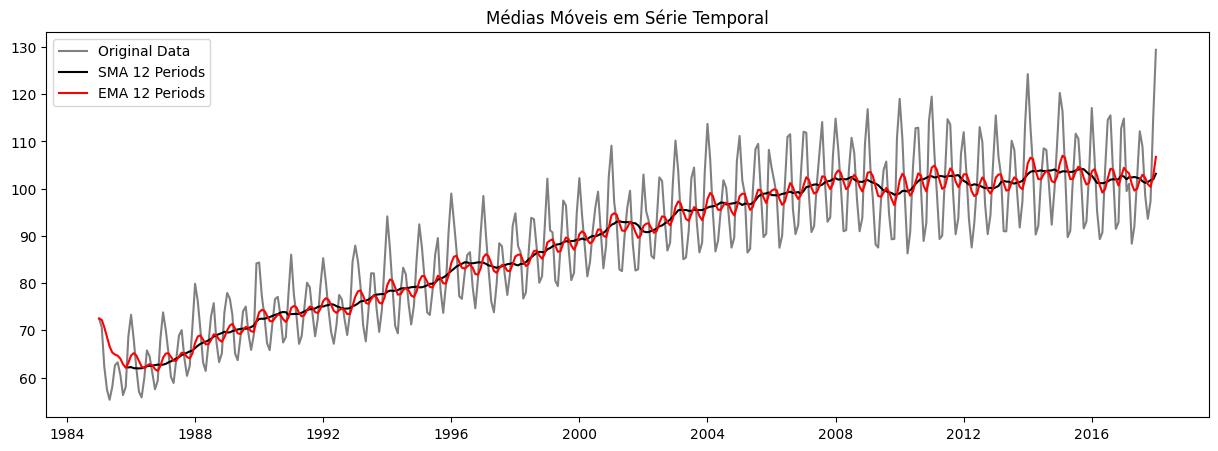

In [ ]:
# Calcular a Média Móvel Simples (SMA)
window_size = 12
df['SMA'] = df['Value'].rolling(window=window_size).mean()

# Calcular a Média Móvel Exponencial (EMA)
df['EMA'] = df['Value'].ewm(span=window_size, adjust=False).mean()

# Plotar os resultados
plt.figure(figsize=(15, 5))
plt.plot(df['Value'], label='Original Data', color='gray')
plt.plot(df['SMA'], label=f'SMA {window_size} Periods', color='black')
plt.plot(df['EMA'], label=f'EMA {window_size} Periods', color='red')
plt.title('Médias Móveis em Série Temporal')
plt.legend()
plt.show()

### **Método de Suavização de Holt-winters (Alisamento Exponencial triplo)**

A série em estudo apresenta tendência e sazonalidade então será aplicado o método de suavização de Holtwinters (Alisamento Exponencial triplo)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


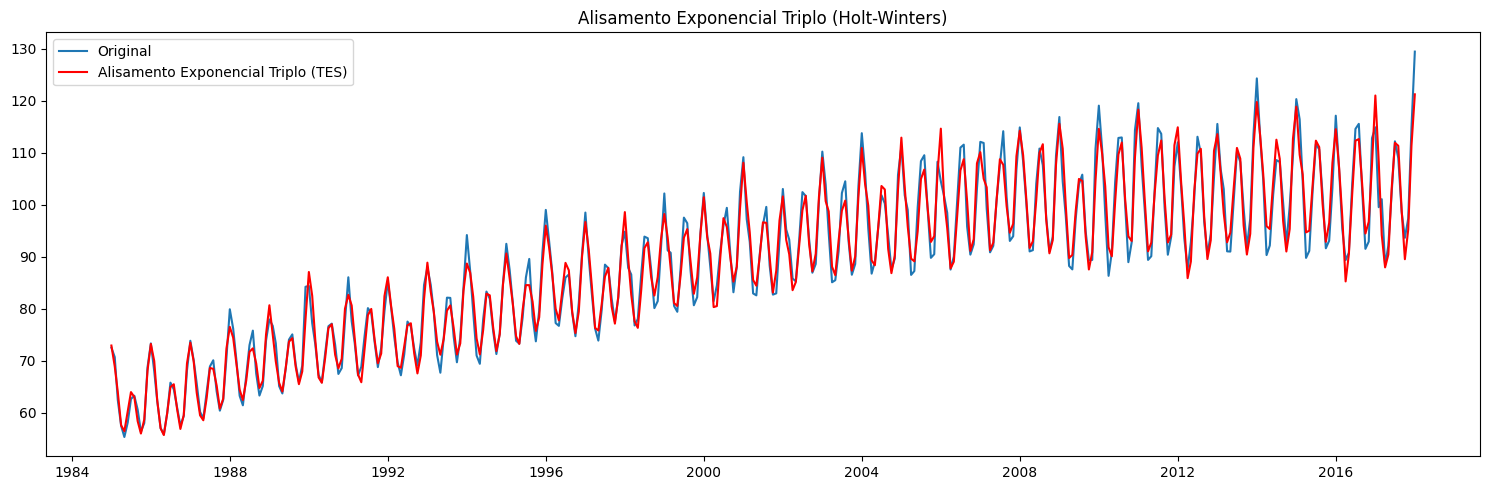

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

modelo = ExponentialSmoothing(df['Value'], trend='add', seasonal='add', seasonal_periods=12)
ajuste = modelo.fit()
df['TES'] = ajuste.fittedvalues

# Série original e Alisamento Exponencial Triplo
plt.figure(figsize=(15, 5))
plt.plot(df['Value'], label='Original')
plt.plot(df['TES'], label='Alisamento Exponencial Triplo (TES)', color='red')
plt.title('Alisamento Exponencial Triplo (Holt-Winters)')
plt.legend()

plt.tight_layout()
plt.show()

# **Parte 2: MODELAGEM E PREVISÃO DE SÉRIES TEMPORAIS**

# **AJUSTE E PREVISÃO: MODELO DE HOLT-WINTERS (Alisamento Exponencial Triplo)**

### **Extrapolação: 12 meses fora do intervalo de previsão**

In [ ]:
# Fazer previsões para os próximos 12 períodos (meses)
previsao = ajuste.forecast(steps=12)

# Visualizando a previsão junto com os dados originais
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Dados Originais')
#plt.plot(df['TES'], label='Alisamento Exponencial Triplo (TES)', color='red')
plt.plot(previsao.index, previsao, label='Previsão', linestyle='--', color='red')
plt.title('Previsão com Holt-Winters')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

### **RMSE e MAE para o modelo Holt_Winters**

Calcular métricas como o RMSE (Root Mean Square Error) e MAE (Mean Absolute Error) para  quantificar o erro entre os valores previstos pelo modelo e os valores reais observados na série temporal.

In [ ]:
pip install statsmodels scikit-learn numpy


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSE
rmse_H = np.sqrt(mean_squared_error(df['Value'], df['TES']))

# MAE
mae_H = mean_absolute_error(df['Value'], df['TES'])

print("RMSE_Holt:", rmse_H)
print("MAE_Holt:", mae_H)



RMSE_Holt: 2.521542565411404
MAE_Holt: 1.9490706837056087


Interpretação:

RMSE = o consumo de energia estimado esta em média 2.5Kwh acima dos valores observados

MAE = em média as previsões erram por 1,94Kwh em relação ao valor real

# **SÉRIES ESTACIONÁRIAS**

#**AJUSTE E PREVISÃO: MODELO ARMA**

### **1) Verificar a estacionariedade**

Se a série não for estacionária será necessário usar um método de transformação para tornar a série estacionária.

No exemplo, usou-se o método de diferenciação e a analise a seguir será realizada na série diferenciada estacionária por ser um pressusposto do modelo
ARMA


### **2)Identificação do modelo**

identificar a ordem p e q do modelo arma por meio da ACF e PACF da série diferenciada

<Figure size 1500x500 with 0 Axes>

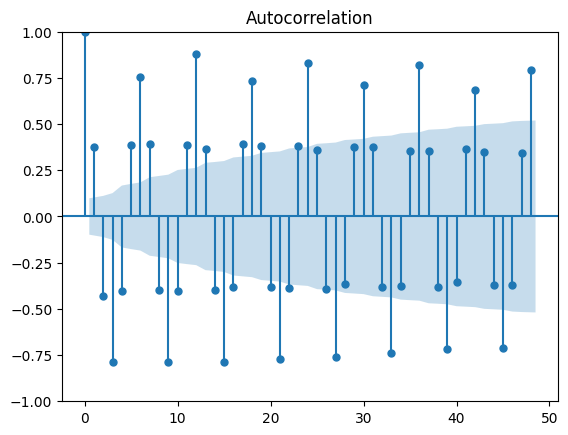

<Figure size 1500x500 with 0 Axes>

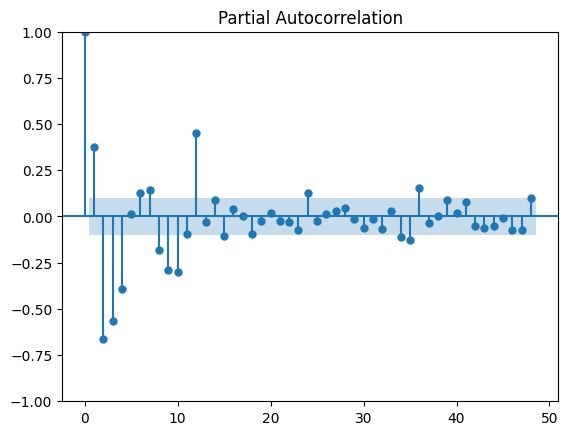

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plotando a função de autocorrelação
plt.figure(figsize=(15, 5))
plot_acf(diff_df, lags=48)
plt.show()

# Plotando a função de autocorrelação parcial
plt.figure(figsize=(15, 5))
plot_pacf(diff_df, lags=48)
plt.show()

ACF da série diferenciada: o maior valor está em 12, além de valores positivos altos em múltiplos de 12. É possível observar inclusive um padrão pelos picos que são causados pela sazonalidade. Não existe um comportamento decrescente dos valores de autocorrelação porque foi tratada a tendência dos dados pelo método de diferenciação.

###**3)Estimação dos parâmetros para a série diferenciada**

In [59]:
from statsmodels.tsa.arima.model import ARIMA

# Aplicar a primeira diferenciação
diff_df = df['Value'].diff().dropna()#Aplica a diferenciação à série e remove o primeiro valor NaN

# Definir a ordem do modelo ARMA(p,q)
p = 3  # ordem AR
q = 3  # ordem MA

# Ajustar o modelo ARMA
model1 = ARIMA(diff_df, order=(p, 0, q))  # order=(p, d, q), com d=0 para série estacionária
model_fit1 = model1.fit()

# Resumo do ajuste
print(model_fit1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  396
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1045.183
Date:                Fri, 23 Aug 2024   AIC                           2106.366
Time:                        16:55:55   BIC                           2138.217
Sample:                    02-01-1985   HQIC                          2118.984
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1036      0.164      0.634      0.526      -0.217       0.424
ar.L1          0.0293      0.055      0.533      0.594      -0.078       0.137
ar.L2         -0.0289      0.055     -0.525      0.6

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Pelo pvalor nem todos os parâmetros foram significativos considerando 5% o nível de significância. No entanto, será mantido no modelo pelo parametros significativos em outras defasagens e menor AIC e BIC.

Um coeficiente MA de magnitude superior a 1 (como -1,12) pode indicar um comportamento onde o modelo está tentando corrigir "demais" os erros passados, o que pode levar a oscilações ou instabilidade na série.

O coeficiente de MA com magnitude superior a 1 podem sugerir que o modelo é inadequado ou que pode estar capturando mais ruído do que o desejado.
Por estar tentando corrigir "demais" os erros passados pode levar a oscilações ou instabilidade na série

### **4)Validação do Modelo**

###**Critério de Informação: AIC e BIC**

###**Análise dos Resíduos**

### **Verificar resíduo como ruído branco**

In [60]:
#Resíduos
residuals1 = model_fit1.resid


### **Verificar média zero**

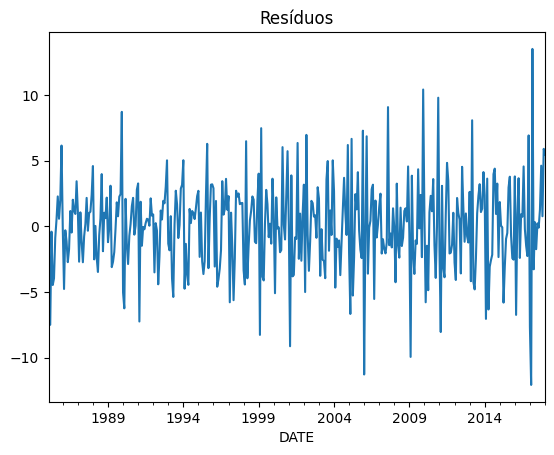

In [61]:
# Plotar gráfico dos resíduos
residuals1.plot(title='Resíduos')
plt.show()

###**Verificar autocorrelação nos resíduos**

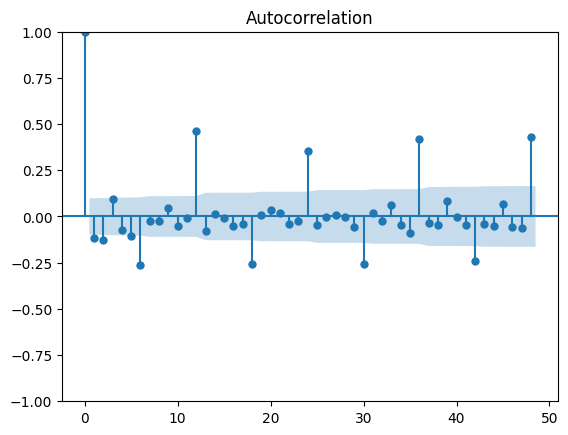

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plotar ACF dos resíduos
plot_acf(residuals1, lags=48)
plt.show()

Resultado: apresentou autocorrelação sazonal (lag=12, 24, 36, 48)

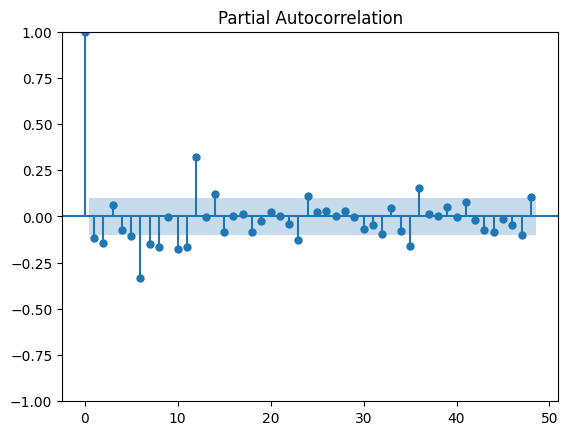

In [63]:
# Plotar PACF dos resíduos
plot_pacf(residuals1, lags=48)
plt.show()

### **Teste estatístico para verificar autocorrelação**

In [64]:
# Teste de Ljung-Box para autocorrelação dos resíduos
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuals1, lags=[10], return_df=True)
print(ljung_box_test)

print('Teste de Ljung-Box')
print('Teste Estatístico: {:.4f}'.format(ljung_box_test['lb_stat'].values[0]))
print('Valor-p: {:.4f}'.format(ljung_box_test['lb_pvalue'].values[0]))

# Interpretação do resultado
if ljung_box_test['lb_pvalue'].values[0] < 0.05:
    print("A série apresenta autocorrelação significativa (Rejeita H0).")
else:
    print("A série não apresenta autocorrelação significativa (Não rejeita H0).")

      lb_stat     lb_pvalue
10  52.814541  8.060270e-08
Teste de Ljung-Box
Teste Estatístico: 52.8145
Valor-p: 0.0000
A série apresenta autocorrelação significativa (Rejeita H0).


### **Verificar heterocedasticidade nos resíduos**

### **Aplicar o Teste ARCH**

In [65]:
from statsmodels.stats.diagnostic import het_arch
# Teste ARCH nos resíduos do modelo ARMA ajustado
test_stat, p_value, _, _ = het_arch(residuals1)

print(f"Estatística de Teste ARCH: {test_stat}")
print(f"Valor-p: {p_value}")

if p_value > 0.05:
    print("Não rejeitamos a hipótese nula: Não há evidências de heterocedasticidade condicional (não há efeito ARCH).")
else:
    print("Rejeitamos a hipótese nula: Há evidências de heterocedasticidade condicional (possível efeito ARCH).")



Estatística de Teste ARCH: 44.400509901035576
Valor-p: 2.7887806321603695e-06
Rejeitamos a hipótese nula: Há evidências de heterocedasticidade condicional (possível efeito ARCH).


### **Gráfico resíduos vs tempo**

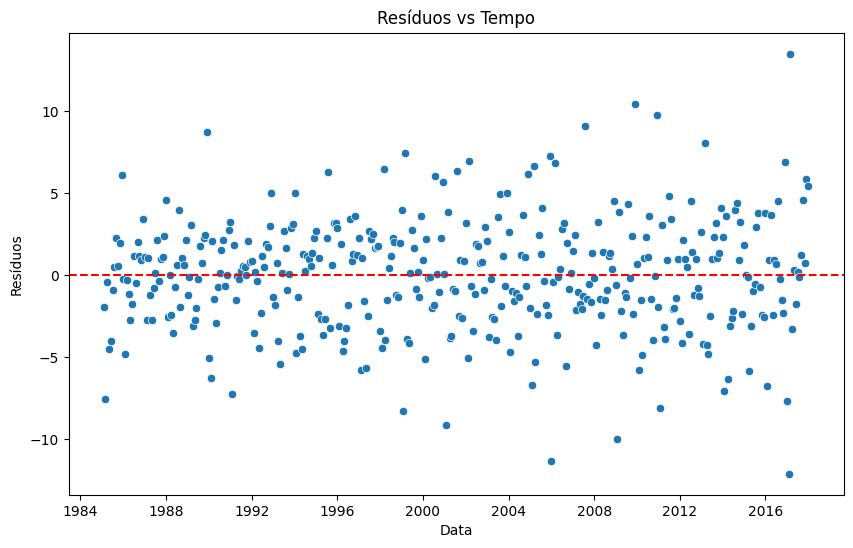

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(residuals1)
plt.title('Resíduos vs Tempo')
plt.xlabel('Data')
plt.ylabel('Resíduos')
plt.axhline(0, color='red', linestyle='--')
plt.show()


### **Gráfico resíduos vs. valores ajustados**

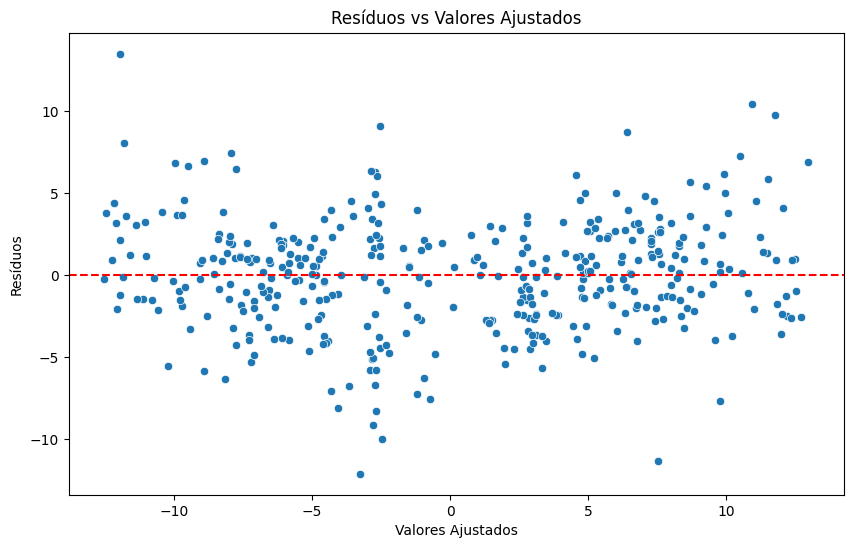

In [67]:
fitted_values = model_fit1.fittedvalues
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals1)
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.axhline(0, color='red', linestyle='--')
plt.show()


### **Verificar normalidade nos resíduos**

### **Teste de Shapiro Wilk**

In [68]:
from scipy.stats import shapiro, normaltest, anderson
shapiro_test = shapiro(residuals1)
print(f"Shapiro-Wilk Teste: Estatística = {shapiro_test.statistic}, p-value = {shapiro_test.pvalue}")

if shapiro_test.pvalue > 0.05:
    print("Não rejeitamos a hipótese nula: Os resíduos são normalmente distribuídos.")
else:
    print("Rejeitamos a hipótese nula: Os resíduos não são normalmente distribuídos.")


Shapiro-Wilk Teste: Estatística = 0.9894768919020538, p-value = 0.00606437970086128
Rejeitamos a hipótese nula: Os resíduos não são normalmente distribuídos.


### **Histograma**

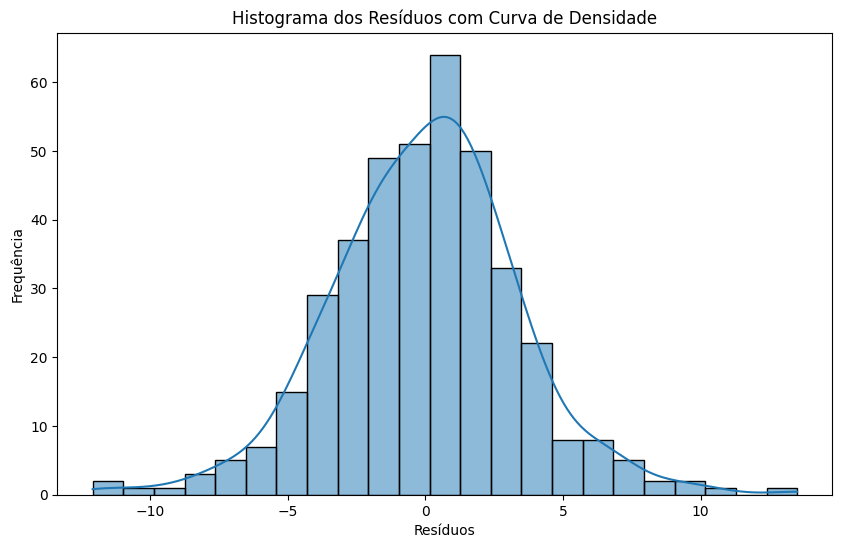

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals1, kde=True)
plt.title('Histograma dos Resíduos com Curva de Densidade')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

### **Gráfico QQplot**

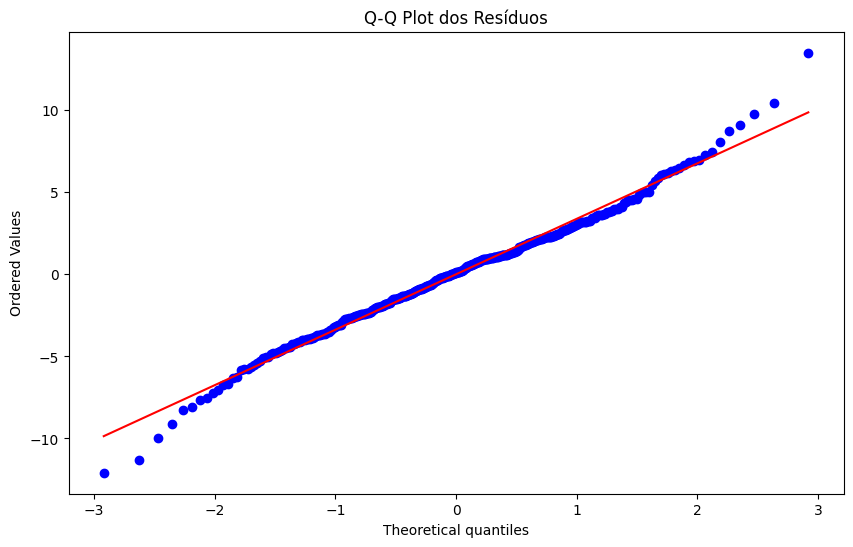

In [70]:
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals1, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')
plt.show()

### **Previsão**

O modelo ARMA mostrou-se não adequado aos dados. A análise de resíduo não foi verificada. Nesse caso, o Modelo ARMA não é confiável para fazer a previsão. Entretanto, a previsão será realizada por fins de estudo para aula prática

### **Interpolação: dentro do intervalo da série temporal**

In [71]:
# Gerar previsões para a série diferenciada
previsoes_diff = model_fit1.predict(start=0, end=len(diff_df))
print(previsoes_diff )

1985-02-01     0.103614
1985-03-01    -0.711363
1985-04-01    -4.564769
1985-05-01     2.321093
1985-06-01     6.748061
                ...    
2017-10-01    -9.612378
2017-11-01     2.962282
2017-12-01    11.493098
2018-01-01     9.243561
2018-02-01    -3.352376
Freq: MS, Name: predicted_mean, Length: 397, dtype: float64


In [72]:
# Reverter a diferenciação para voltar à escala original
last_value = df['Value'].iloc[0]
previsoes = previsoes_diff.cumsum() + last_value
print(previsoes)


1985-02-01     72.608814
1985-03-01     71.897451
1985-04-01     67.332682
1985-05-01     69.653776
1985-06-01     76.401837
                 ...    
2017-10-01    103.841191
2017-11-01    106.803472
2017-12-01    118.296570
2018-01-01    127.540131
2018-02-01    124.187755
Freq: MS, Name: predicted_mean, Length: 397, dtype: float64


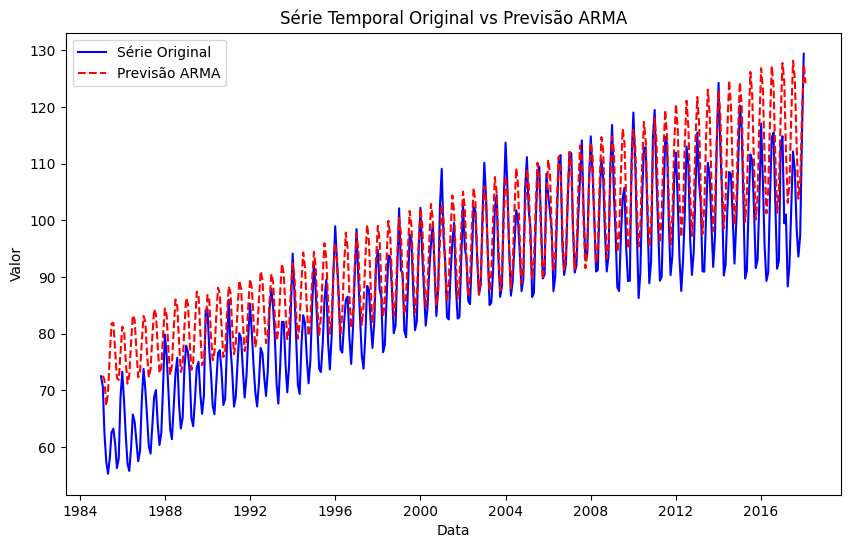

In [73]:
plt.figure(figsize=(10, 6))

# Plot da série original
plt.plot( df['Value'], label='Série Original', color='blue')
plt.plot(previsoes.index, previsoes, label='Previsão ARMA', color='red', linestyle='--')
# Detalhes do gráfico
plt.title('Série Temporal Original vs Previsão ARMA')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

### **RMSE e MAE para o modelo ARMA**

Calcular métricas como o RMSE (Root Mean Square Error) e MAE (Mean Absolute Error) para  quantificar o erro entre os valores previstos pelo modelo e os valores reais observados na série temporal.

In [ ]:
pip install statsmodels scikit-learn numpy


In [74]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSE
rmse = np.sqrt(mean_squared_error(df['Value'], previsoes))

# MAE
mae = mean_absolute_error(df['Value'], previsoes)

print("RMSE:", rmse)
print("MAE:", mae)



RMSE: 11.060001687345741
MAE: 9.140020843935153


Interpretação:

RMSE = 11 significa que o consumo de energia estimado esta em média 11Kwh acima dos valores observados

MAE = 9 significa que em média, as previsões erram por 9Kwh em relação ao valor real

### **Extrapolação: 12 meses fora do intervalo de previsão**

In [75]:
# Gerar previsões para a série diferenciada
previsoes_diff0=model_fit1.forecast(steps=12)
print(previsoes_diff0)

2018-02-01    -3.352376
2018-03-01   -11.795718
2018-04-01    -9.215208
2018-05-01     3.528415
2018-06-01    12.020282
2018-07-01     9.396366
2018-08-01    -3.292185
2018-09-01   -11.828271
2018-10-01    -9.165124
2018-11-01     3.472416
2018-12-01    12.048780
2019-01-01     9.350222
Freq: MS, Name: predicted_mean, dtype: float64


In [76]:
# Reverter a diferenciação para voltar à escala original
last_value = df['Value'].iloc[-1]
previsoes0 = previsoes_diff0.cumsum() + last_value
print(previsoes0)

2018-02-01    126.052424
2018-03-01    114.256705
2018-04-01    105.041498
2018-05-01    108.569913
2018-06-01    120.590195
2018-07-01    129.986561
2018-08-01    126.694376
2018-09-01    114.866105
2018-10-01    105.700981
2018-11-01    109.173397
2018-12-01    121.222177
2019-01-01    130.572399
Freq: MS, Name: predicted_mean, dtype: float64


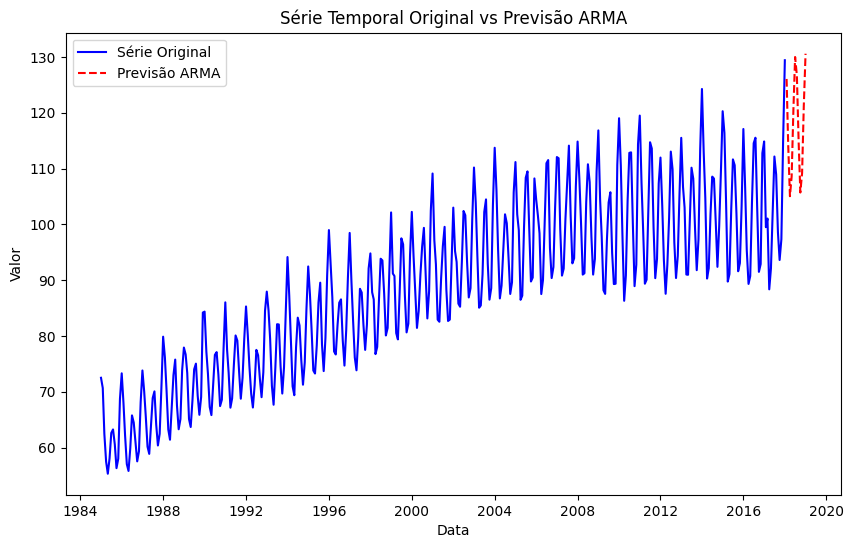

In [77]:
plt.figure(figsize=(10, 6))

# Plot da série original
plt.plot( df['Value'], label='Série Original', color='blue')
plt.plot(previsoes0.index, previsoes0, label='Previsão ARMA', color='red', linestyle='--')
# Detalhes do gráfico
plt.title('Série Temporal Original vs Previsão ARMA')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

# **SÉRIES NÃO ESTACIONÁRIAS**

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


#**AJUSTE E PREVISÃO: MODELO ARIMA**

### **Identificação dos parametros do modelo**

Picos significativos na ACF indica a ordem de q

Picos significativos na PACF indica a ordem de p

<Figure size 1500x500 with 0 Axes>

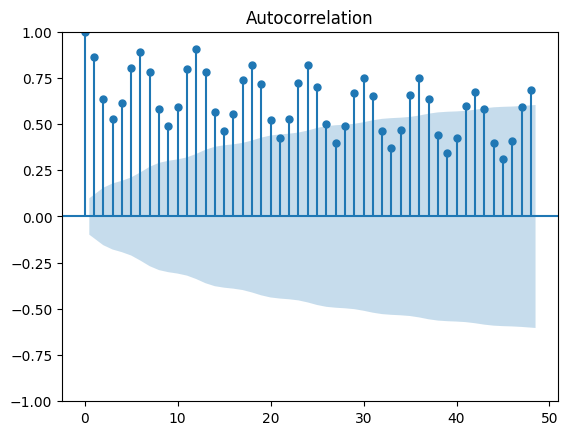

<Figure size 1500x500 with 0 Axes>

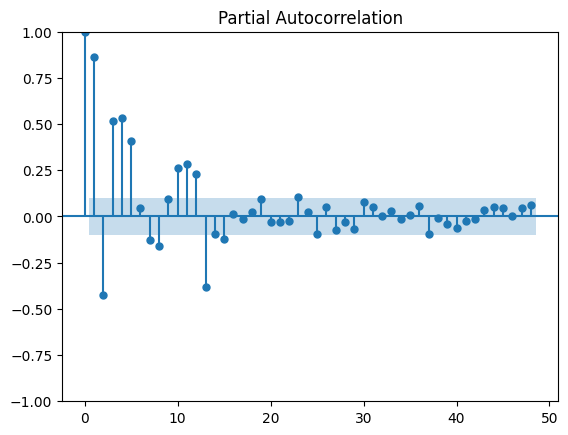

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plotando a função de autocorrelação
plt.figure(figsize=(15, 5))
plot_acf(df['Value'], lags=48)
plt.show()

# Plotando a função de autocorrelação parcial
plt.figure(figsize=(15, 5))
plot_pacf(df['Value'], lags=48)
plt.show()

ACF: apresentou um comportamento de tendência e sazonalidade. Os picos mais altos representam um padrão sendo seguido a cada 6 defasagens porque a sazonalidade é semestral.


### **Ajuste do modelo ARIMA(p,d,q)**

In [80]:
# Definir a ordem do modelo ARIMA(p,d,q)
p = 3 # ordem AR
d = 1  # ordem de diferenciação
q = 2  # ordem MA

model_arima = ARIMA(df['Value'], order=(p, d, q))
arima_result = model_arima.fit()
print(arima_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  397
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1042.734
Date:                Fri, 23 Aug 2024   AIC                           2097.467
Time:                        16:57:54   BIC                           2121.356
Sample:                    01-01-1985   HQIC                          2106.931
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8566      0.045     18.907      0.000       0.768       0.945
ar.L2         -0.8560      0.045    -19.205      0.000      -0.943      -0.769
ar.L3         -0.1432      0.045     -3.188      0.0

Pelo pvalor todos os parâmetros foram significativos a 5% de significância

Ar1: 85% do valor atual da série é explicada pelo valor imediatamente anterior.

Ar2: 85% do valor atual é explicado pelo valor defasodo de ordem 2 de forma inversamente proporcional

Ar3: 14% do valor atual da série é explicado pelo valor defasado de ordem 3 de forma inversamente proporcional.

AM1: -1,03 indica que o modelo está capturando mais erros passados do que deveria

MA2: os erros passados esta impactanto 97% no valor atual.

### **Validação do Modelo ARIMA**

###**Critério de Informação: AIC e BIC**

###**Análise dos Resíduos**

### **Verificar resíduo como ruído branco**

In [81]:
#Resíduos
residuals2 = arima_result.resid
#print(residuals2)

### **Verificar média zero nos resíduos**

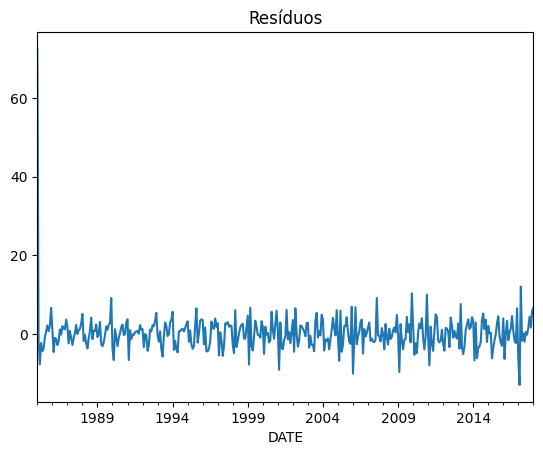

In [82]:
# Plotar gráfico dos resíduos
residuals2.plot(title='Resíduos')
plt.show()

###**Verificar autocorrelação nos resíduos**

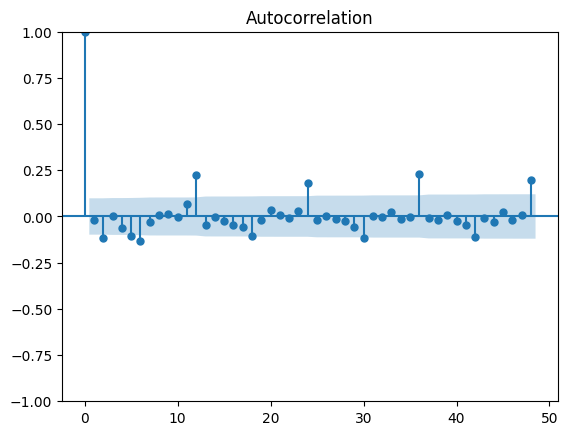

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plotar ACF dos resíduos modelo ARIMA
plot_acf(residuals2, lags=48)
plt.show()

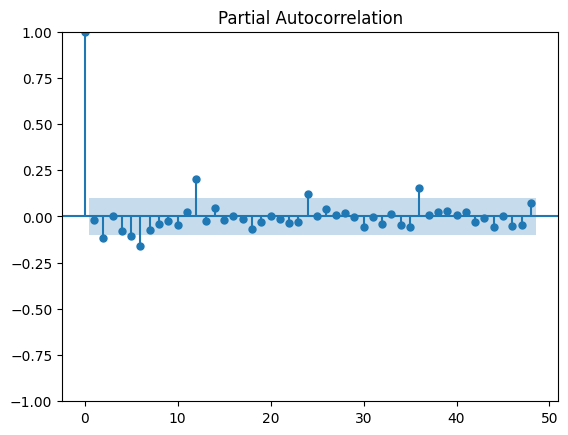

In [84]:
# Plotar PACF dos resíduos modelo ARIMA
plot_pacf(residuals2, lags=48)
plt.show()

In [85]:
# Teste de Ljung-Box para autocorrelação dos resíduos modelo ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuals2, lags=[10], return_df=True)
print(ljung_box_test)

print('Teste de Ljung-Box')
print('Teste Estatístico: {:.4f}'.format(ljung_box_test['lb_stat'].values[0]))
print('Valor-p: {:.4f}'.format(ljung_box_test['lb_pvalue'].values[0]))

# Interpretação do resultado
if ljung_box_test['lb_pvalue'].values[0] < 0.05:
    print("A série apresenta autocorrelação significativa (Rejeita H0).")
else:
    print("A série não apresenta autocorrelação significativa (Não rejeita H0).")

      lb_stat  lb_pvalue
10  18.883336    0.04177
Teste de Ljung-Box
Teste Estatístico: 18.8833
Valor-p: 0.0418
A série apresenta autocorrelação significativa (Rejeita H0).


In [86]:
from statsmodels.stats.diagnostic import het_arch

# Teste ARCH nos resíduos do modelo ARIMA ajustado para verificar homogeneidade de variância
test_stat, p_value, _, _ = het_arch(residuals2)

print(f"Estatística de Teste ARCH: {test_stat}")
print(f"Valor-p: {p_value}")

if p_value > 0.05:
    print("Não rejeitamos a hipótese nula: Não há evidências de heterocedasticidade condicional (não há efeito ARCH).")
else:
    print("Rejeitamos a hipótese nula: Há evidências de heterocedasticidade condicional (possível efeito ARCH).")



Estatística de Teste ARCH: 27.91264869487553
Valor-p: 0.0018642970464900115
Rejeitamos a hipótese nula: Há evidências de heterocedasticidade condicional (possível efeito ARCH).


### **Gráfico resíduos vs tempo**

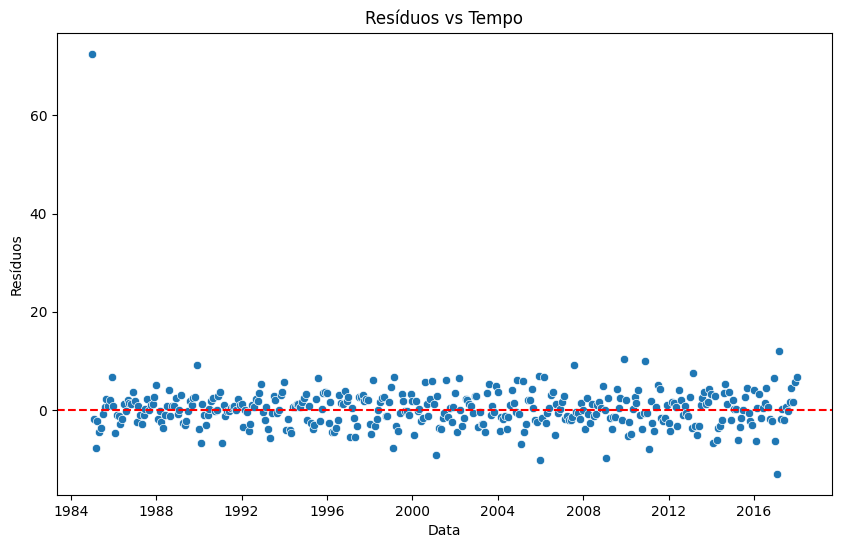

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(residuals2)
plt.title('Resíduos vs Tempo')
plt.xlabel('Data')
plt.ylabel('Resíduos')
plt.axhline(0, color='red', linestyle='--')
plt.show()


### **Resíduos vs Valores Ajustados**

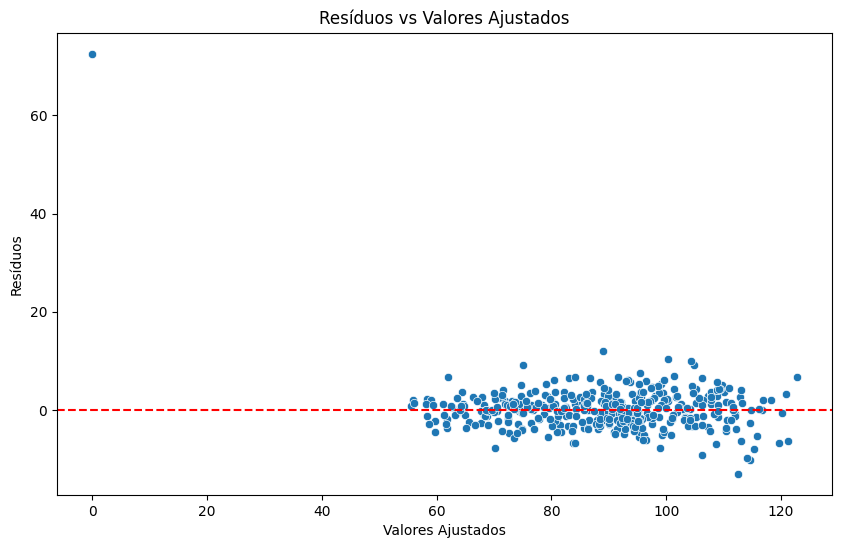

In [88]:
fitted_values = arima_result.fittedvalues
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals2)
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.axhline(0, color='red', linestyle='--')
plt.show()


### **Verificar normalidade nos resíduos (Opcional)**

### **Teste de Shapiro Wilk**

In [89]:
from scipy.stats import shapiro, normaltest, anderson
shapiro_test = shapiro(residuals2)
print(f"Shapiro-Wilk Teste: Estatística = {shapiro_test.statistic}, p-value = {shapiro_test.pvalue}")

if shapiro_test.pvalue > 0.05:
    print("Não rejeitamos a hipótese nula: Os resíduos são normalmente distribuídos.")
else:
    print("Rejeitamos a hipótese nula: Os resíduos não são normalmente distribuídos.")


Shapiro-Wilk Teste: Estatística = 0.6150703597544463, p-value = 8.212807999811268e-29
Rejeitamos a hipótese nula: Os resíduos não são normalmente distribuídos.


### **Histograma**

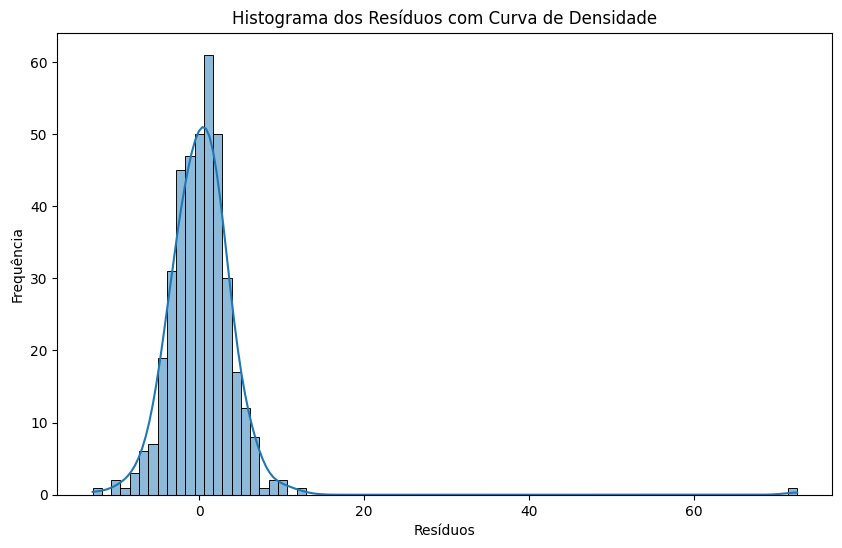

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals2, kde=True)
plt.title('Histograma dos Resíduos com Curva de Densidade')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

### **Gráfico QQplot**

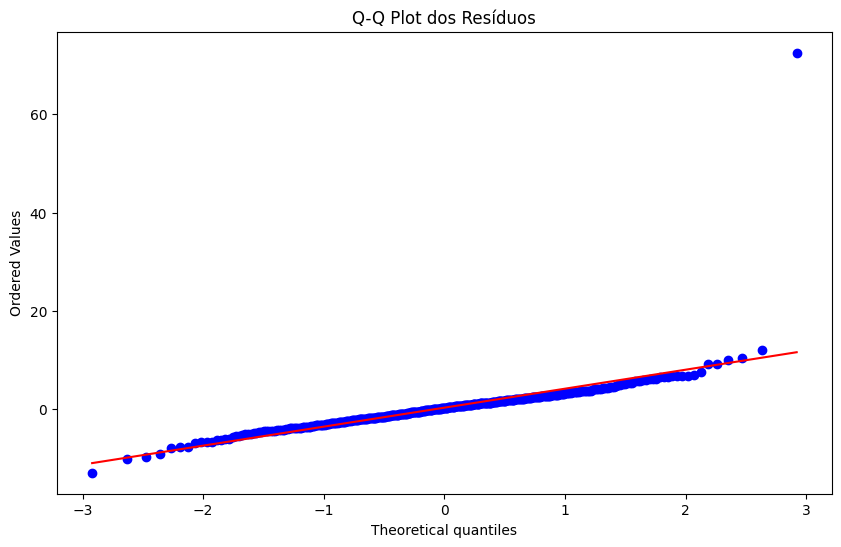

In [92]:
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals2, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')
plt.show()

### **Previsão**

O modelo ARIMA mostrou-se não adequado aos dados pois não modelou a sazonalidade presente. A análise de resíduo não foi verificada. Nesse caso, o Modelo ARIMA não é confiável para fazer a previsão. Entretanto, a previsão será realizada por fins de estudo para aula prática

### **Interpolação: dentro do intervalo da série temporal**

In [93]:
# Gerar previsões para a série diferenciada
previsoes1= arima_result.predict(start=1, end=len(df['Value']))
print(previsoes1)

1985-02-01     72.506003
1985-03-01     70.128851
1985-04-01     59.727413
1985-05-01     59.661841
1985-06-01     61.762451
                 ...    
2017-10-01     89.164764
2017-11-01     95.678562
2017-12-01    108.901267
2018-01-01    122.708663
2018-02-01    125.284969
Freq: MS, Name: predicted_mean, Length: 397, dtype: float64


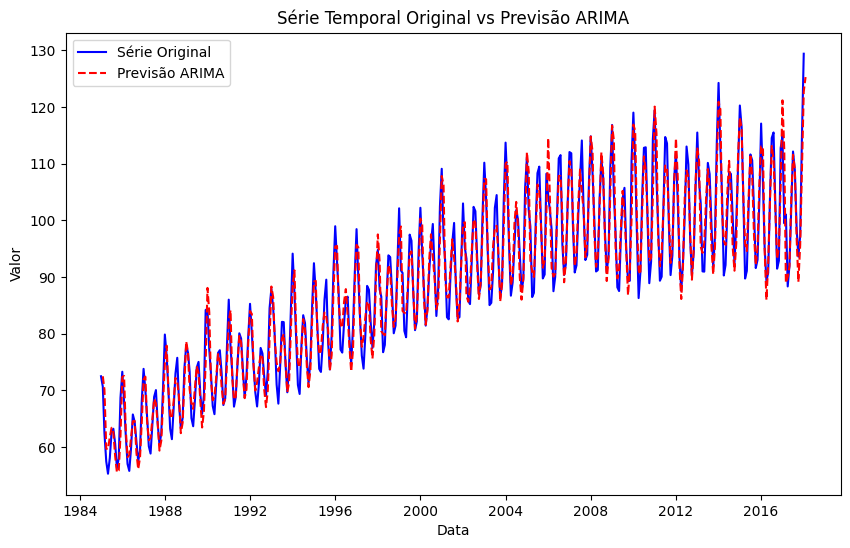

In [94]:
plt.figure(figsize=(10, 6))

# Plot da série original
plt.plot( df['Value'], label='Série Original', color='blue')
plt.plot(previsoes1.index, previsoes1, label='Previsão ARIMA', color='red', linestyle='--')
# Detalhes do gráfico
plt.title('Série Temporal Original vs Previsão ARIMA')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

### **RMSE e MAE para o modelo ajustado**

Calcular métricas como o RMSE (Root Mean Square Error) e MAE (Mean Absolute Error) para  quantificar o erro entre os valores previstos pelo modelo e os valores reais observados na série temporal.

In [ ]:
pip install statsmodels scikit-learn numpy


In [95]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSE
rmse1 = np.sqrt(mean_squared_error(df['Value'], previsoes1))

# MAE
mae1 = mean_absolute_error(df['Value'], previsoes1)

print("RMSE_Arima:", rmse1)
print("MAE_Arima:", mae1)



RMSE_Arima: 6.856623734404823
MAE_Arima: 6.072640459513896


Interpretação:

RMSE = o consumo de energia estimado esta em média 6,85Kwh acima dos valores observados

MAE = em média as previsões erraram por 6,07Kwh em relação ao valor real

### **Extrapolação: 12 meses fora do intervalo de previsão**

In [98]:
# Gerar previsões para a série diferenciada
previsoes11=arima_result.forecast(steps=12)
print(previsoes11)

2018-02-01    125.284969
2018-03-01    113.232903
2018-04-01    104.333628
2018-05-01    107.617167
2018-06-01    119.773036
2018-07-01    128.648833
2018-08-01    125.376076
2018-09-01    113.234676
2018-10-01    104.365405
2018-11-01    107.629823
2018-12-01    119.756422
2019-01-01    128.619219
Freq: MS, Name: predicted_mean, dtype: float64


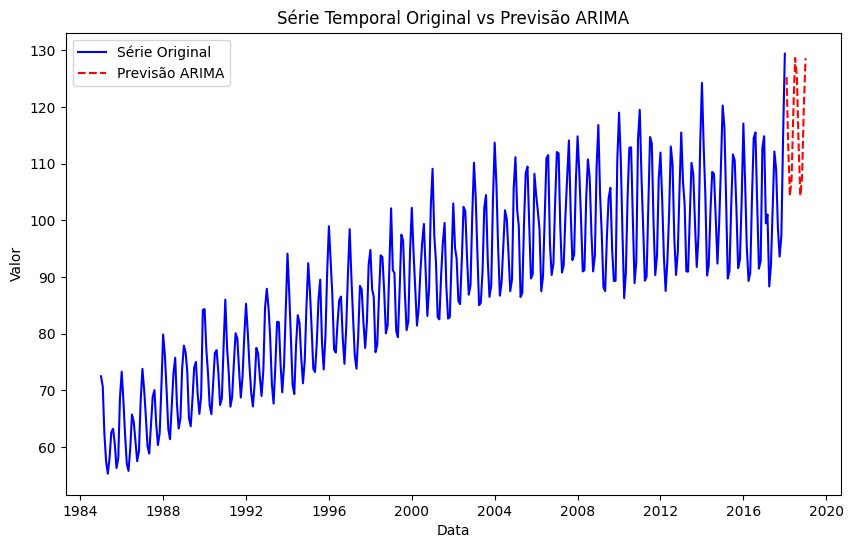

In [99]:
plt.figure(figsize=(10, 6))

# Plot da série original
plt.plot( df['Value'], label='Série Original', color='blue')
plt.plot(previsoes11.index, previsoes11, label='Previsão ARIMA', color='red', linestyle='--')
# Detalhes do gráfico
plt.title('Série Temporal Original vs Previsão ARIMA')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

##**AJUSTE E PREVISÃO: MODELO SARIMA**

### **Identificação dos parametros do modelo**

Picos significativos na ACF indica a ordem de q

Picos significativos na PACF indica a ordem de p

P e Q lags sazonais

<Figure size 1500x500 with 0 Axes>

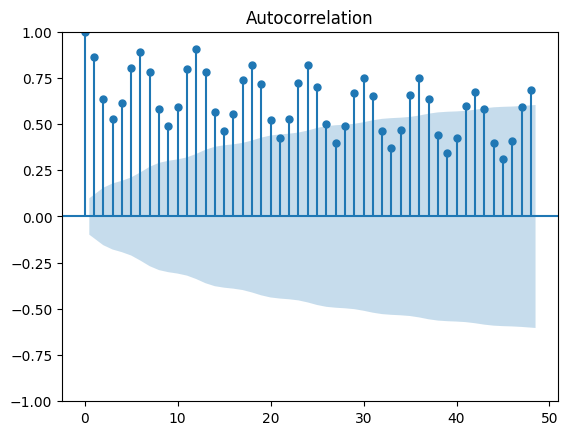

<Figure size 1500x500 with 0 Axes>

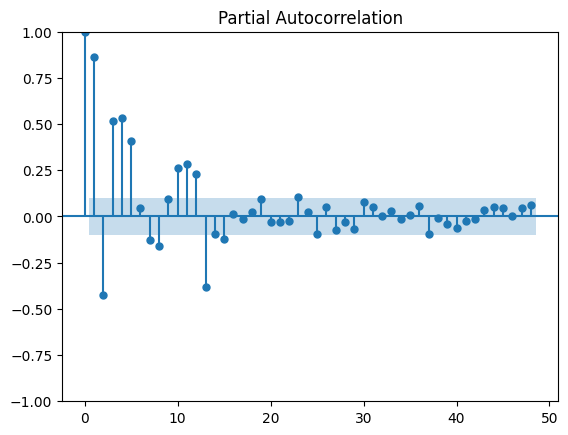

In [101]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plotando a função de autocorrelação
plt.figure(figsize=(15, 5))
plot_acf(df['Value'], lags=48)
plt.show()

# Plotando a função de autocorrelação parcial
plt.figure(figsize=(15, 5))
plot_pacf(df['Value'], lags=48)
plt.show()

ACF: o maior valor está em 6, além de valores positivos altos em múltiplos de 6. Isso porque a sazonalidade aqui é semestral. É possível observar inclusive um padrão sendo seguido a cada 6 defasagens. Os picos são causados pela sazonalidade, enquanto que o comportamento decrescente dos valores de autocorrelação ocorrem por conta de uma tendência

### **Identificação dos parametros do modelo**

### **Ajuste do modelo SARIMA(p,d,q)(P,D,Q,S)**

In [102]:
# Definir a ordem do modelo ARIMA(p,d,q)
p = 1 # ordem AR
d = 1  # ordem de diferenciação
q = 1  # ordem MA
P = 1
D = 0
Q = 1
s = 12

model_sarima = SARIMAX(df['Value'], order=(p, d, q), seasonal_order=(P, D, Q ,s))
sarima_result = model_sarima.fit()
print(sarima_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  397
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -927.693
Date:                            Fri, 23 Aug 2024   AIC                           1865.387
Time:                                    17:11:11   BIC                           1885.294
Sample:                                01-01-1985   HQIC                          1873.273
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5311      0.044     12.191      0.000       0.446       0.617
ma.L1         -0.9576      0.017   

Pelo pvalor todos os parâmetros são signicativos a 5% de significância

Ar1: 53% do valor atual da série é explicado pelo termo imediatamente anterior

Ma1: Os erros passados estão impactando 95% do valor atual da série de forma inversamente proporcional

AR_s1: 99% do valor da série é explicado pelo comportamento sazonal imediatamente anterior.

ma_s: os erros passados gerados pela sazonalidade está impactanto 75% do valor da série inversamete proporcional

### **Validação do Modelo SARIMA**

###**Critério de Informação: AIC e BIC**

###**Análise dos Resíduos do modelo**

### **Verificar resíduo como ruído branco**

In [103]:
#Resíduos
residuals3 = sarima_result.resid


### **Verificar média zero nos resíduos**

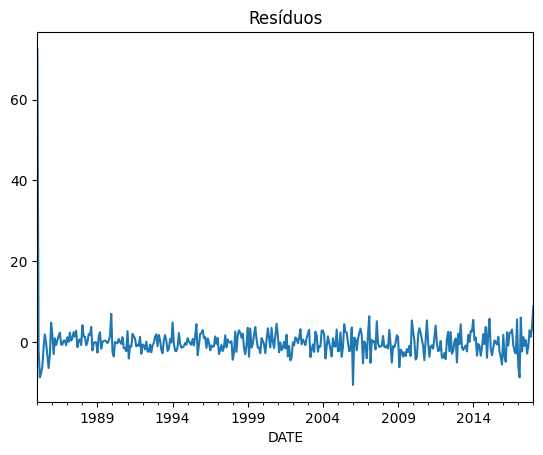

In [104]:
# Plotar gráfico dos resíduos
residuals3.plot(title='Resíduos')
plt.show()

###**Verificar autocorrelação nos resíduos**

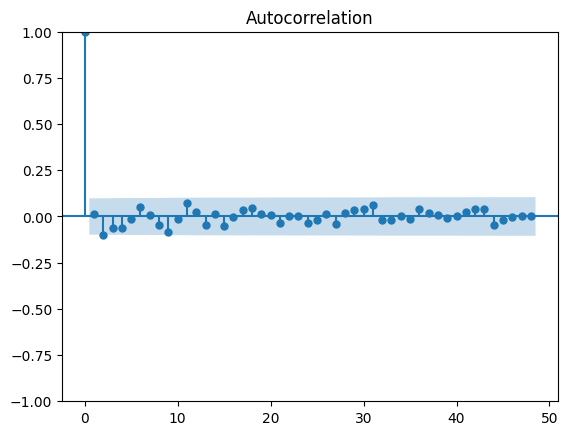

In [105]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plotar ACF dos resíduos modelo ARIMA
plot_acf(residuals3, lags=48)
plt.show()

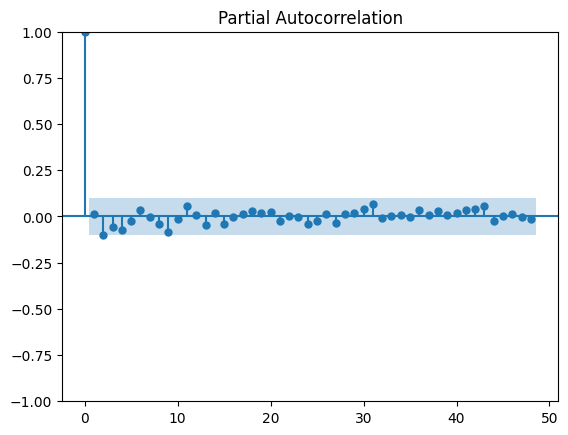

In [106]:
# Plotar PACF dos resíduos modelo ARIMA
plot_pacf(residuals3, lags=48)
plt.show()

In [107]:
# Teste de Ljung-Box para autocorrelação dos resíduos modelo ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuals3, lags=[10], return_df=True)
print(ljung_box_test)

print('Teste de Ljung-Box')
print('Teste Estatístico: {:.4f}'.format(ljung_box_test['lb_stat'].values[0]))
print('Valor-p: {:.4f}'.format(ljung_box_test['lb_pvalue'].values[0]))

# Interpretação do resultado
if ljung_box_test['lb_pvalue'].values[0] < 0.05:
    print("A série apresenta autocorrelação significativa (Rejeita H0).")
else:
    print("A série não apresenta autocorrelação significativa (Não rejeita H0).")

      lb_stat  lb_pvalue
10  12.423169   0.257733
Teste de Ljung-Box
Teste Estatístico: 12.4232
Valor-p: 0.2577
A série não apresenta autocorrelação significativa (Não rejeita H0).


In [108]:
from statsmodels.stats.diagnostic import het_arch

# Teste ARCH nos resíduos do modelo ARIMA ajustado para verificar homogeneidade de variância
test_stat, p_value, _, _ = het_arch(residuals3)

print(f"Estatística de Teste ARCH: {test_stat}")
print(f"Valor-p: {p_value}")

if p_value > 0.05:
    print("Não rejeitamos a hipótese nula: Não há evidências de heterocedasticidade condicional (não há efeito ARCH).")
else:
    print("Rejeitamos a hipótese nula: Há evidências de heterocedasticidade condicional (possível efeito ARCH).")



Estatística de Teste ARCH: 17.791823128848588
Valor-p: 0.05857847989512208
Não rejeitamos a hipótese nula: Não há evidências de heterocedasticidade condicional (não há efeito ARCH).


### **Gráfico resíduos vs tempo**

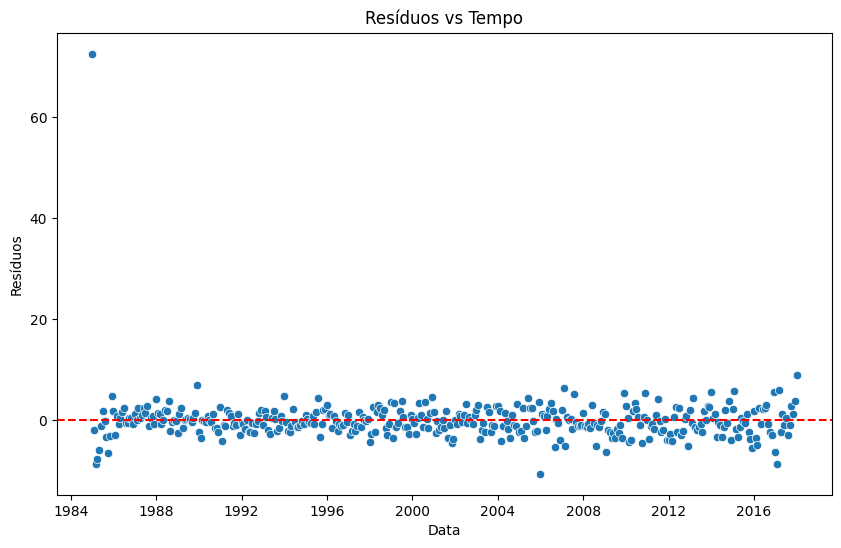

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(residuals3)
plt.title('Resíduos vs Tempo')
plt.xlabel('Data')
plt.ylabel('Resíduos')
plt.axhline(0, color='red', linestyle='--')
plt.show()


### **Resíduos vs Valores Ajustados**

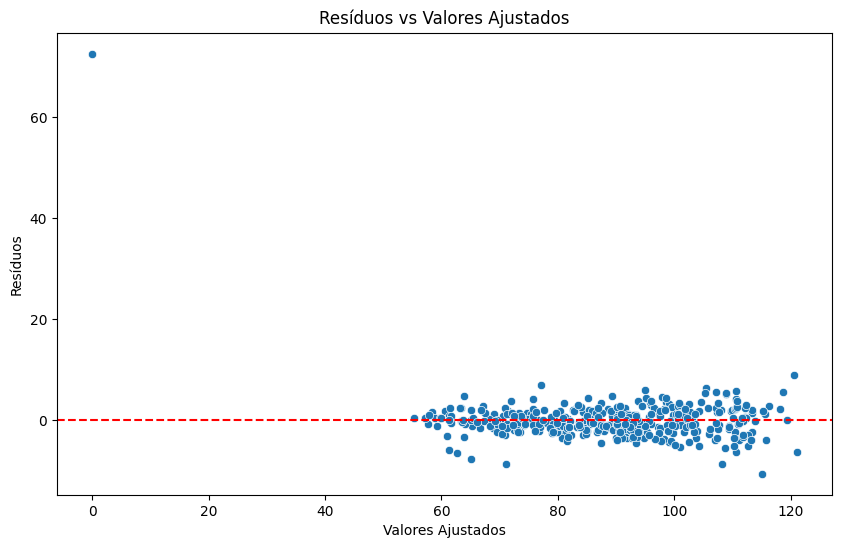

In [110]:
fitted_values = sarima_result.fittedvalues
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals3)
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.axhline(0, color='red', linestyle='--')
plt.show()


### **Verificar normalidade nos resíduos**

### **Teste de Shapiro Wilk**

In [111]:
from scipy.stats import shapiro, normaltest, anderson
shapiro_test = shapiro(residuals3)
print(f"Shapiro-Wilk Teste: Estatística = {shapiro_test.statistic}, p-value = {shapiro_test.pvalue}")

if shapiro_test.pvalue > 0.05:
    print("Não rejeitamos a hipótese nula: Os resíduos são normalmente distribuídos.")
else:
    print("Rejeitamos a hipótese nula: Os resíduos não são normalmente distribuídos.")


Shapiro-Wilk Teste: Estatística = 0.47656932787663286, p-value = 1.7970560139701148e-32
Rejeitamos a hipótese nula: Os resíduos não são normalmente distribuídos.


### **Histograma**

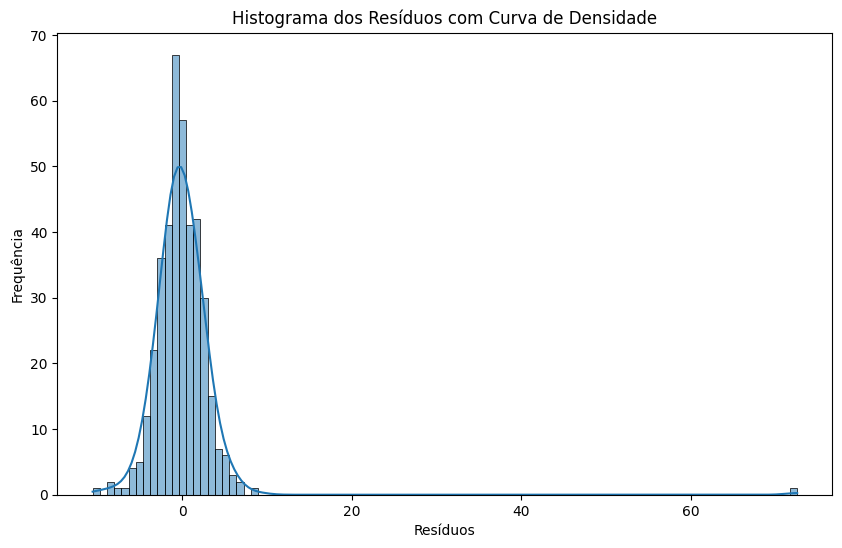

In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals3, kde=True)
plt.title('Histograma dos Resíduos com Curva de Densidade')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

### **Gráfico QQplot**

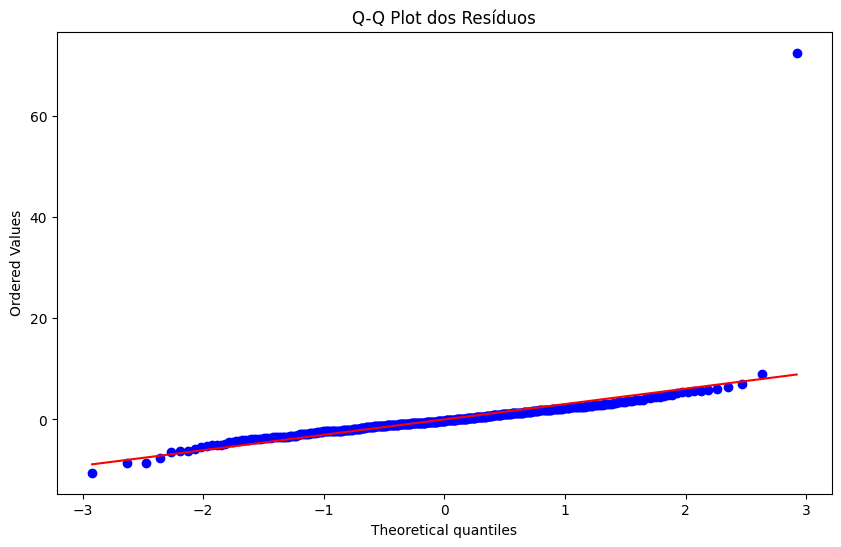

In [113]:
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals3, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')
plt.show()

### **Previsão**

O modelo SARIMA mostrou-se adequado aos dados. A análise de resíduo foi verificada exceto para normalidade dos erros que não é obrigatório. Nesse caso, o Modelo SARIMA parece ser confiável para fazer a previsão.

### **Interpolação: dentro do intervalo da série temporal**

In [114]:
# Gerar previsões para a série diferenciada
previsoes2= sarima_result.predict(start=1, end=len(df['Value']))
print(previsoes2)

1985-02-01     72.504127
1985-03-01     71.099221
1985-04-01     65.079967
1985-05-01     61.220210
1985-06-01     59.283038
                 ...    
2017-10-01     90.687185
2017-11-01     95.980923
2017-12-01    110.815860
2018-01-01    120.483663
2018-02-01    114.338121
Freq: MS, Name: predicted_mean, Length: 397, dtype: float64


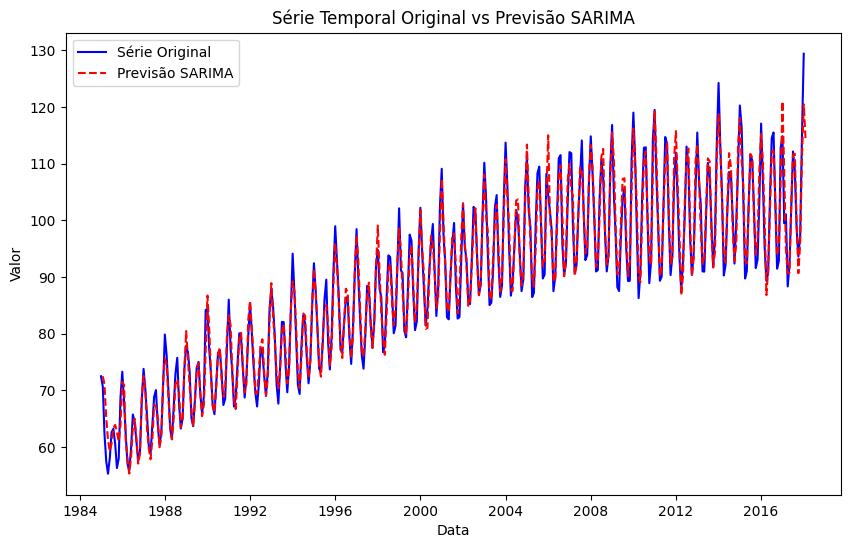

In [115]:
plt.figure(figsize=(10, 6))

# Plot da série original
plt.plot( df['Value'], label='Série Original', color='blue')
plt.plot(previsoes2.index, previsoes2, label='Previsão SARIMA', color='red', linestyle='--')
# Detalhes do gráfico
plt.title('Série Temporal Original vs Previsão SARIMA')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

### **RMSE e MAE para o modelo ajustado**

Calcular métricas como o RMSE (Root Mean Square Error) e MAE (Mean Absolute Error) para  quantificar o erro entre os valores previstos pelo modelo e os valores reais observados na série temporal.

In [ ]:
pip install statsmodels scikit-learn numpy


In [116]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSE
rmse2 = np.sqrt(mean_squared_error(df['Value'], previsoes2))

# MAE
mae2 = mean_absolute_error(df['Value'], previsoes2)

print("RMSE_Sarima:", rmse2)
print("MAE_Sarima:", mae2)



RMSE_Sarima: 6.907727568607756
MAE_Sarima: 5.947917247084308


Interpretação:

RMSE = o consumo de energia estimado esta em média 6,9Kwh acima dos valores observados

MAE =  em média as previsões erraram por 5,94Kwh em relação ao valor real

### **Extrapolação: 12 meses fora do intervalo de previsão**

In [117]:
# Gerar previsões para a série diferenciada
#previsoes22= sarima_result.predict(start=1, end=len(df['Value'])+12)
previsoes22=sarima_result.forecast(steps=12)
print(previsoes22)

2018-02-01    114.338121
2018-03-01    105.165888
2018-04-01     92.952183
2018-05-01     94.288282
2018-06-01    104.644065
2018-07-01    113.732067
2018-08-01    112.556715
2018-09-01    102.029955
2018-10-01     94.045029
2018-11-01     97.249401
2018-12-01    112.335731
2019-01-01    121.872879
Freq: MS, Name: predicted_mean, dtype: float64


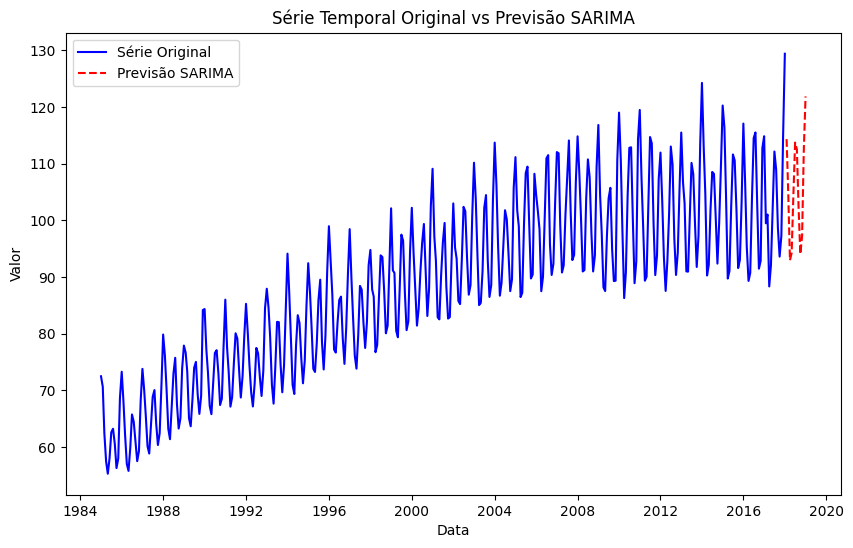

In [118]:
plt.figure(figsize=(10, 6))

# Plot da série original
plt.plot( df['Value'], label='Série Original', color='blue')
plt.plot(previsoes22.index, previsoes22, label='Previsão SARIMA', color='red', linestyle='--')
# Detalhes do gráfico
plt.title('Série Temporal Original vs Previsão SARIMA')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

# **MODELOS COM INTERVENÇÃO**

## **Ajuste de Modelos com Intervenção ARIMA/SARIMA**

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Data de intervenção
intervention = 210  # Parece que a intervenção ocorrou na posição 220

# Criando a variável exógena (indicador) para o tipo de intervenção nível
intervention_level = np.zeros(len(df['Value']))
intervention_level[intervention:] = 1

#Intervenção: Mudança de Nível Permanente
model_level = SARIMAX(df['Value'], order=(1,1,1),seasonal_order=(1, 0, 1 ,12), exog=intervention_level) #intervenção para mudança de nível que modificou o valor médio da série
fit_level = model_level.fit()
forecast_level = fit_level.get_forecast(steps=len(df['Value']) - intervention, exog=intervention_level[intervention:])
forecast_values_level = forecast_level.predicted_mean
print(forecast_values_level )

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2018-02-01    114.286482
2018-03-01    105.100761
2018-04-01     92.884463
2018-05-01     94.223879
2018-06-01    104.584118
                 ...    
2033-04-01     99.842913
2033-05-01    101.636889
2033-06-01    111.702691
2033-07-01    120.432794
2033-08-01    119.401814
Freq: MS, Name: predicted_mean, Length: 187, dtype: float64


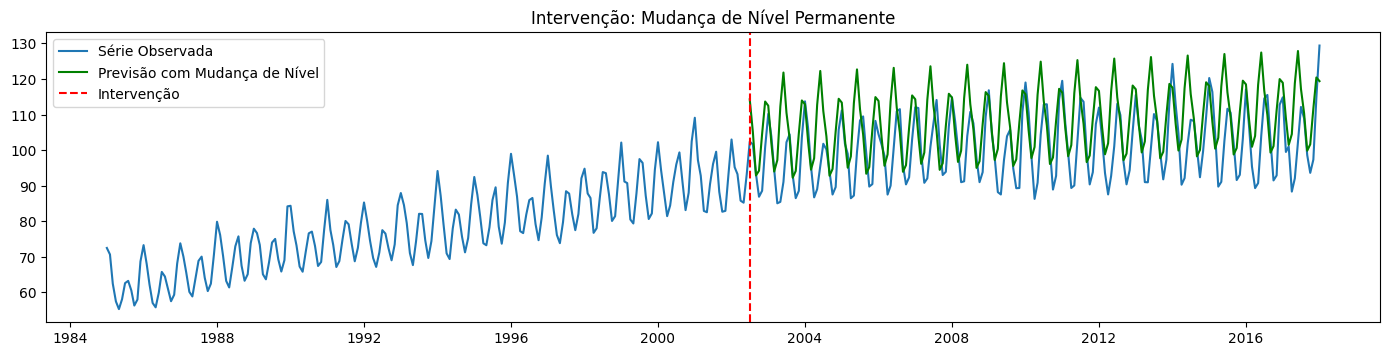

In [120]:
# Gráfico da intervenção com Mudança de Nível Permanente
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
plt.plot(df.index, df['Value'], label='Série Observada')
plt.plot(df.index[intervention:], forecast_values_level, label='Previsão com Mudança de Nível', color='green')
plt.axvline(df.index[intervention], color='red', linestyle='--', label='Intervenção')
plt.title('Intervenção: Mudança de Nível Permanente')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Data de intervenção
intervention = 220  # Supondo que a intervenção ocorra na posição 220

# Criando a variável exógena (indicador) para cada tipo de intervenção:
#Pulso Temporário
intervention_pulse = np.zeros(len(df))
intervention_pulse[intervention] = 1

#Mudança e Tendência
intervention_trend = np.zeros(len(df))
intervention_trend[intervention:] = np.arange(1, len(df) - intervention + 1)

#Modelagem com intervenção
#'Intervenção: Pulso Temporário'
model_pulse = SARIMAX(df['Value'], order=(1,1,1),seasonal_order=(1, 0, 1 ,12), exog=intervention_pulse)
fit_pulse = model_pulse.fit()
forecast_pulse = fit_pulse.get_forecast(steps=len(df) - intervention, exog=intervention_pulse[intervention:])
forecast_values_pulse = forecast_pulse.predicted_mean

#Intervenção: Mudança de Tendência
model_trend = SARIMAX(df['Value'], order=(1,1,1),seasonal_order=(1, 0, 1 ,12), exog=intervention_trend)
fit_trend = model_trend.fit()
forecast_trend = fit_trend.get_forecast(steps=len(df) - intervention, exog=intervention_trend[intervention:])
forecast_values_trend = forecast_trend.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


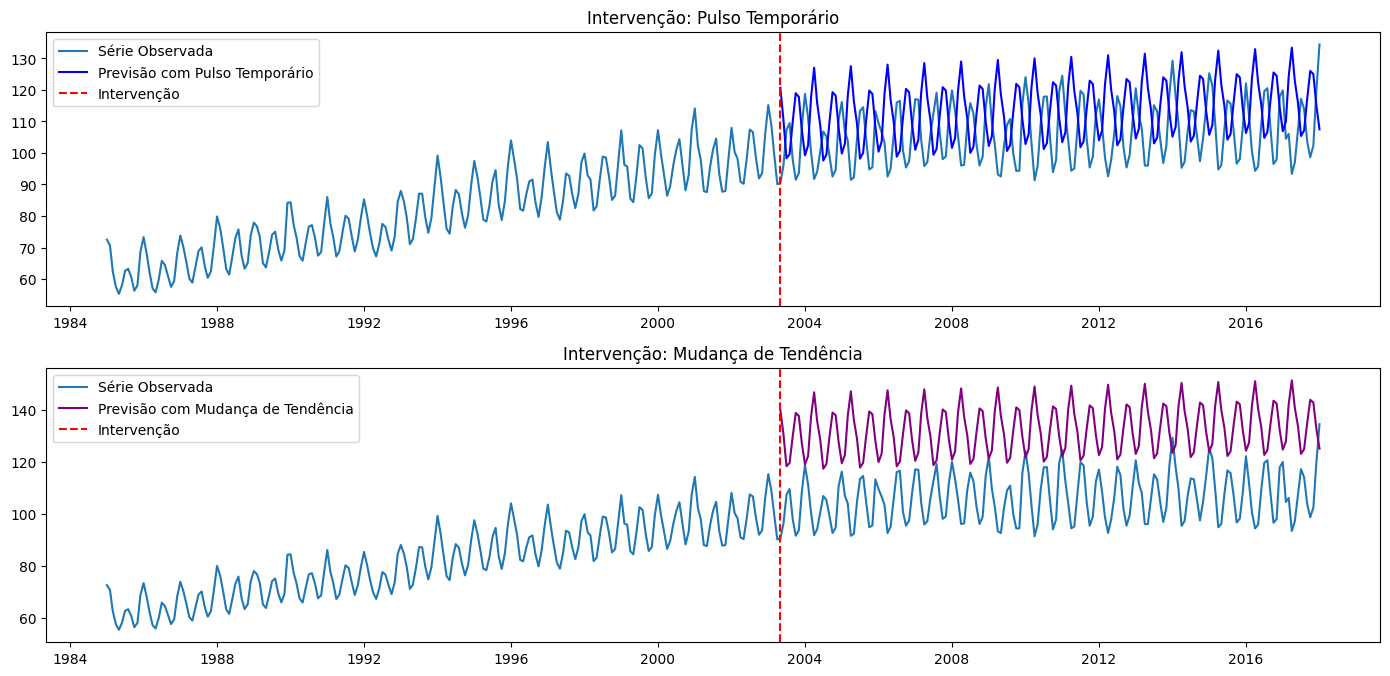

In [ ]:
plt.figure(figsize=(14, 10))

# Pulso Temporário
plt.subplot(3, 1, 2)
plt.plot(df.index, df['Value'], label='Série Observada')
plt.plot(df.index[intervention:], forecast_values_pulse, label='Previsão com Pulso Temporário', color='blue')
plt.axvline(df.index[intervention], color='red', linestyle='--', label='Intervenção')
plt.title('Intervenção: Pulso Temporário')
plt.legend()

# Mudança de Tendência
plt.subplot(3, 1, 3)
plt.plot(df.index, df['Value'], label='Série Observada')
plt.plot(df.index[intervention:], forecast_values_trend, label='Previsão com Mudança de Tendência', color='purple')
plt.axvline(df.index[intervention], color='red', linestyle='--', label='Intervenção')
plt.title('Intervenção: Mudança de Tendência')
plt.legend()

plt.tight_layout()
plt.show()
